# Child Mind Institute: Problematic Internet Use  
Relacionando la actividad física con el uso problemático de Internet

    Autores:
- Victor Hugo Ramíres Ríos  
- Lenika Elizabeth Montoya Valencia  
- Gustavo Gutierrez Navarro  

Todos estudiantes de la **Universidad de Sonora**  

    Fecha: 
- 06 de diciembre de 2024

---
## 0. Introducción

En la era digital actual, la creciente prevalencia del uso problemático de internet entre niños y adolescentes plantea desafíos significativos para la salud mental y el bienestar. Condiciones como la depresión y la ansiedad suelen estar vinculadas al uso excesivo de la tecnología, lo que resalta la importancia de la detección e intervención tempranas.

Esta libreta forma parte de una competencia diseñada para abordar este problema crítico mediante el desarrollo de un modelo predictivo que analiza los datos de actividad física de los niños. El objetivo es identificar indicadores tempranos del uso problemático de internet y tecnología, permitiendo intervenciones oportunas para fomentar hábitos digitales más saludables y mitigar riesgos para la salud mental.

Los datos para esta competencia provienen del *Healthy Brain Network*, un innovador estudio de salud mental realizado en la ciudad de Nueva York. Esta iniciativa, liderada por el *Child Mind Institute*, colabora con familias, líderes comunitarios y patrocinadores para avanzar en nuestra comprensión del cerebro en desarrollo. El apoyo financiero para esta iniciativa ha sido proporcionado por el Departamento de Servicios de Atención Médica de California (*DHCS*) como parte de la *Children and Youth Behavioral Health Initiative (CYBHI)*, con contribuciones adicionales del equipo de Kaggle.

Para más detalles, visita la [página de la competencia en Kaggle](https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/overview).

---
## 1. Librerias

In [ ]:
# Bibliotecas para manipulación y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # pip install plotly.express
import missingno as msno    # pip install missingno

# Modelos y herramientas de Sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.measures import mean_squared_error, make_scorer, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

---
## 2. Importación del dataset
Ejecuta los bloques de código correspondiente según si estás trabajando con archivos locales o en Google Colab.

### 2.2 Archivos locales

In [2]:
DATASETS_PATH = 'datasets/csv/'

### 2.1 Google Colab

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
DATASETS_PATH = '/content/drive/MyDrive/Datasets/'

---
Continuar aquí

In [3]:
train = pd.read_csv(f"{DATASETS_PATH}train.csv")
test = pd.read_csv(f"{DATASETS_PATH}test.csv")
data_dict = pd.read_csv(f"{DATASETS_PATH}data_dictionary.csv")  # Diccionario de datos que describe al dataset

---
## 3. Análisis Exploratorio de Datos (EDA)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            5 non-null      float64


### 3.1 Datos faltantes

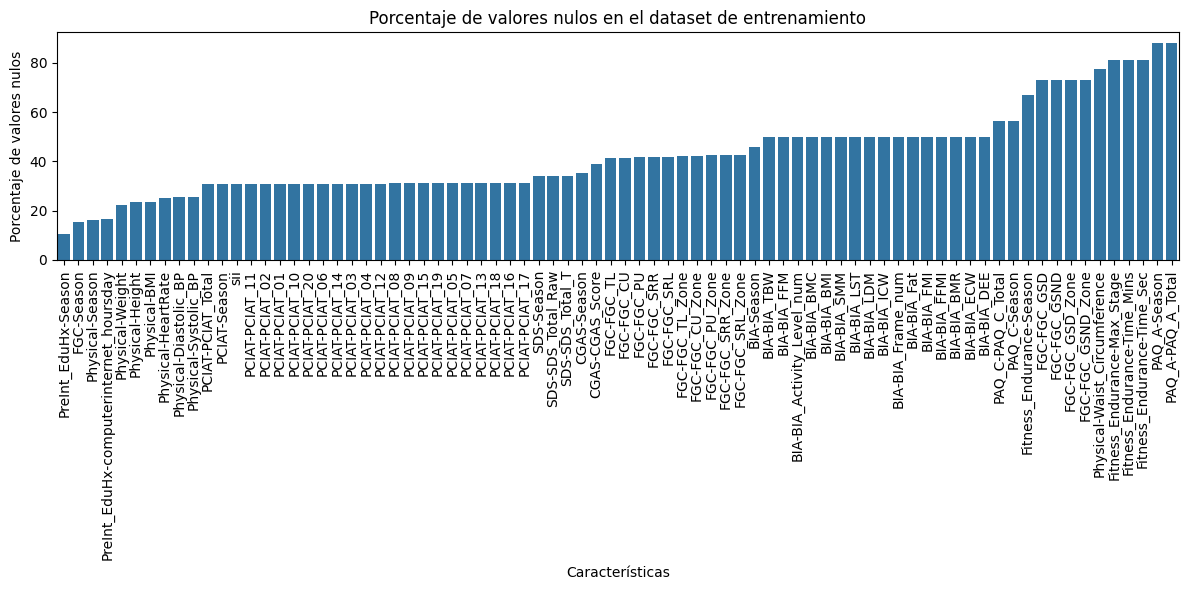

In [6]:
missing_percentages = train.isnull().sum() * 100 / len(train)
missing_percentages_sorted = missing_percentages.sort_values()
missing_percentages_sorted = missing_percentages_sorted[missing_percentages_sorted != 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages_sorted.index, y=missing_percentages_sorted.values)
plt.xticks(rotation=90)
plt.xlabel("Características")
plt.ylabel("Porcentaje de valores nulos")
plt.title("Porcentaje de valores nulos en el dataset de entrenamiento")
plt.tight_layout()
plt.show()

### 3.2 Entrenamiento supervizado
Dado que aproximadamente el **30%** de los datos del **target** están faltantes, podemos optar por dos enfoques:

1. **Eliminar los datos faltantes** y trabajar únicamente de forma **supervisada**.
2. Adoptar un enfoque **semi-supervisado**, estimando los valores faltantes para hacer una predicción con todos los datos disponibles.

Comenzaremos creando el conjunto de datos **train_supervised**, el cual, a partir de ahora, será el que utilizaremos para entrenar nuestro modelo.



In [7]:
train_supervized = train[train['sii'].notnull()]

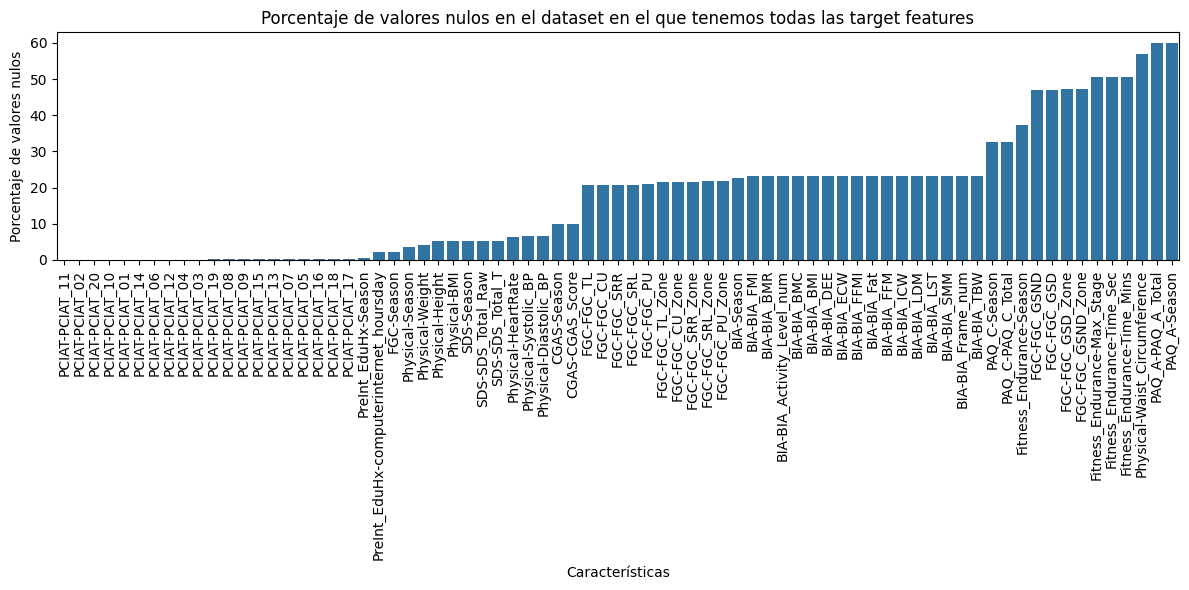

In [8]:
missing_percentages = train_supervized.isnull().sum() * 100 / len(train)
missing_percentages_sorted = missing_percentages.sort_values()
missing_percentages_sorted = missing_percentages_sorted[missing_percentages_sorted != 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages_sorted.index, y=missing_percentages_sorted.values)
plt.xticks(rotation=90)
plt.xlabel("Características")
plt.ylabel("Porcentaje de valores nulos")
plt.title("Porcentaje de valores nulos en el dataset en el que tenemos todas las target features")
plt.tight_layout()
plt.show()

In [23]:
# Finalmente, retiramos todas las columnas que no se encuentren en el conjunto de prueba

train_supervized = train_supervized.drop([col for col in train_supervized.columns if col not in test.columns], axis=1)
train_supervized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

<Axes: >

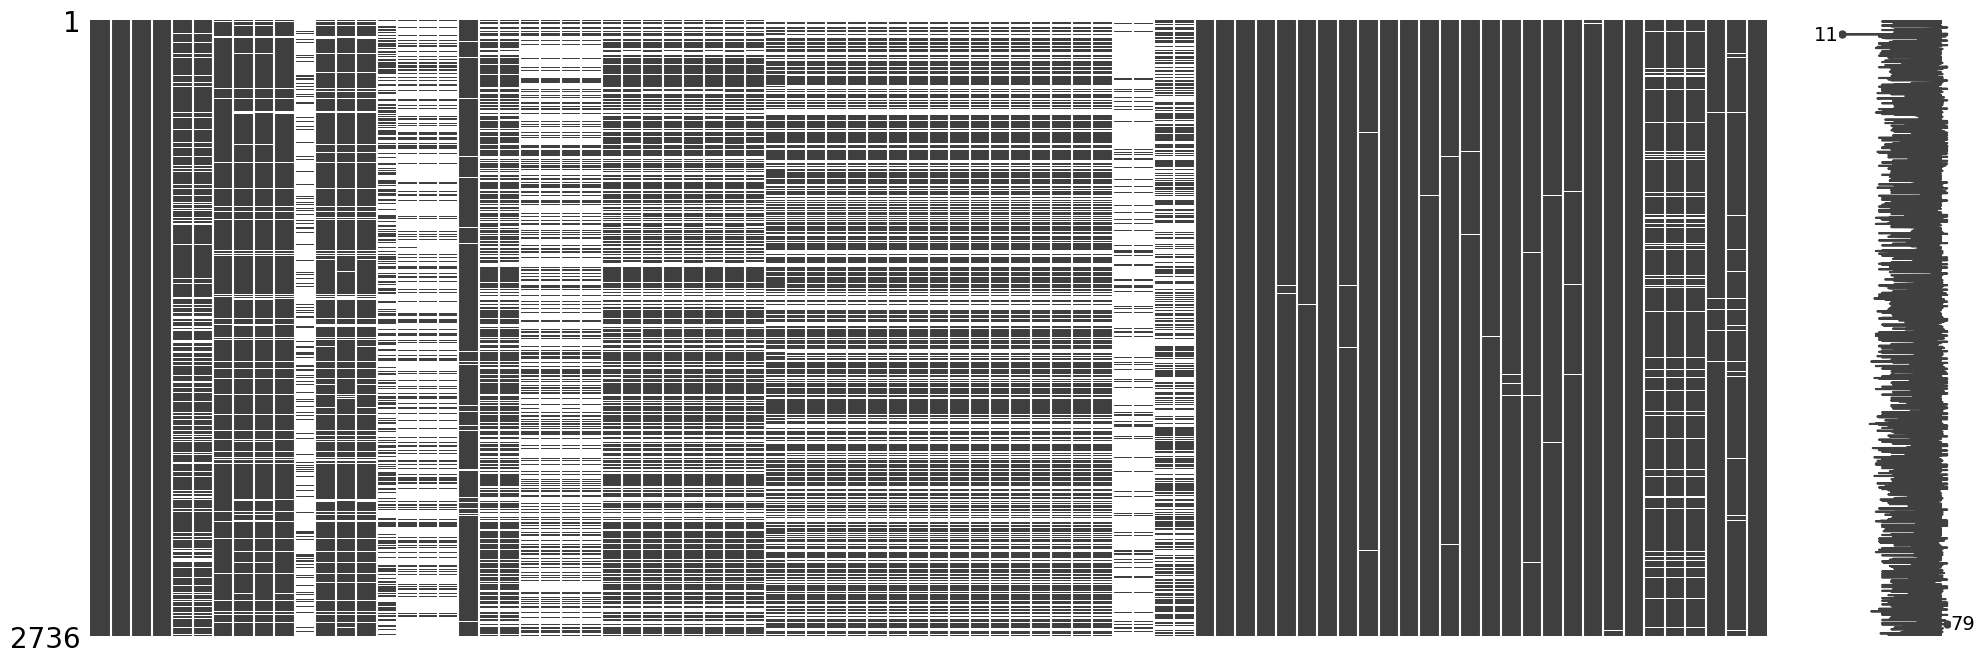

In [ ]:
msno.matrix(train_supervized, figsize=(24,8))

---
## 4. Análisis de las variables

El conjunto de datos es amplio y complejo, por lo que se analiza separándolo en tres grupos:

- **Fitness Gram Child** (Evaluación del estado físico infantil) y **Sleep Disturbance** (Trastornos del sueño): En este grupo se incluyen variables relacionadas con el estado físico general de los niños y posibles problemas de sueño. Se analiza la relación entre estas variables y su impacto en la salud y el bienestar de los niños.
  
- **Bio-electrical Impedance Analysis** (Análisis de impedancia bioeléctrica): Este grupo abarca mediciones relacionadas con la composición corporal de los individuos, como la cantidad de masa grasa y masa muscular, a través de la impedancia bioeléctrica, que es una técnica utilizada para evaluar la salud física.

- **Demographics** (Demografía), **Children's Global Assessment Scale** (Escala de evaluación global de los niños), **Physical** (Físico), **PAQ Adolescents and Children** (Cuestionario de actividad física para adolescentes y niños): Este grupo contiene variables demográficas y de evaluación de la salud mental y física, como la escala global de evaluación del niño y las mediciones de actividad física en diferentes etapas de la niñez y adolescencia.


### 4.1 Evaluación del estado físico infantil y Trastornos del sueño

In [11]:
# Columnas correspondientes

# Estado Físico Infantil 
FGC = ["FGC-Season",
    "FGC-FGC_CU",
    "FGC-FGC_CU_Zone",
    "FGC-FGC_GSND",
    "FGC-FGC_GSND_Zone",
    "FGC-FGC_GSD",
    "FGC-FGC_GSD_Zone",
    "FGC-FGC_PU",
    "FGC-FGC_PU_Zone",
    "FGC-FGC_SRL",
    "FGC-FGC_SRL_Zone",
    "FGC-FGC_SRR",
    "FGC-FGC_SRR_Zone",
    "FGC-FGC_TL",
    "FGC-FGC_TL_Zone"]

# Trastornos del sueño
SDS = ["SDS-Season",
    "SDS-SDS_Total_Raw",
    "SDS-SDS_Total_T"]

<Axes: >

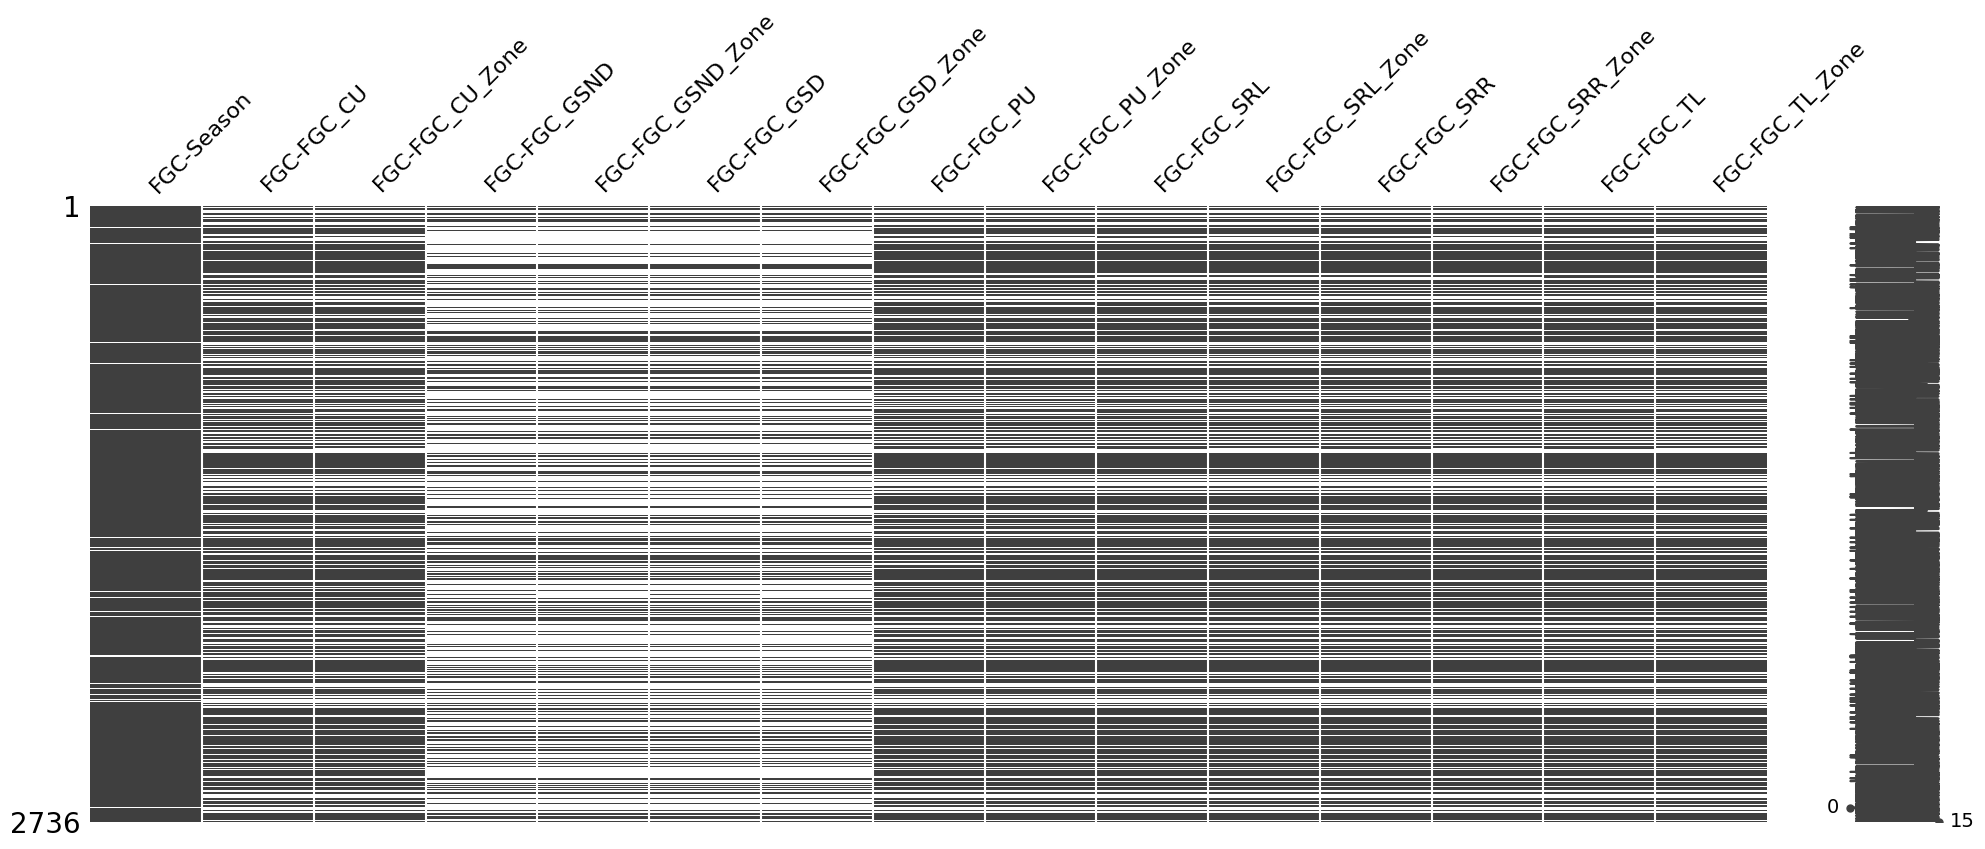

In [12]:
msno.matrix(train_supervized[FGC], figsize=(24,8))

<Axes: >

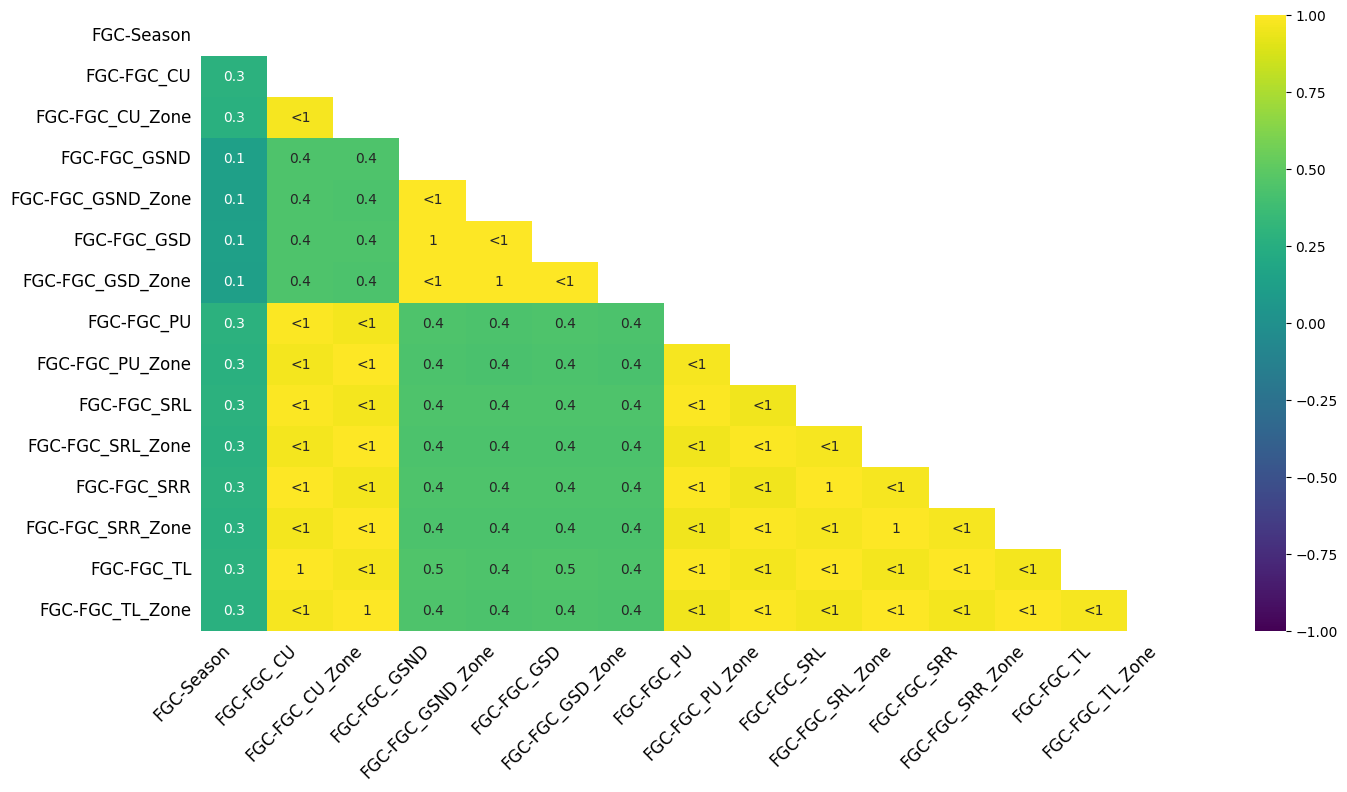

In [13]:
msno.heatmap(train_supervized[FGC], figsize=(16,8), cmap="viridis", fontsize=12)

#### Estado Físico Infantil (Descripción y Analísis)

El **FITNESSGRAM®** utiliza estándares referenciados a criterios para evaluar el rendimiento físico. Estos estándares, establecidos por **The Cooper Institute** de Dallas, Texas, representan niveles de condición física que ofrecen protección contra las enfermedades derivadas de un estilo de vida sedentario.

  Características y consideraciones

- En la mayoría de los casos, si no se realiza alguna medición debido a una causa directa, la métrica de **fitness zone** (zona de condición física) también será marcada como valor nulo.
  
- El **Healthy Fitness Zone** (Zona de Fitness Saludable) se marca, en casi todas las características, como:
  - **0**: Necesita mejorar.
  - **1**: Está dentro de la zona saludable.
  
  La única excepción a esta regla es la **fuerza de agarre**, donde se utiliza una escala ordinal del **1 al 3** (débil, normal y fuerte, respectivamente).

- A diferencia de **FGC-Season**, todas las demás características del **FGC** tienen correlación con la pérdida de datos. Las métricas **FGC-FGC_GSND** y **FGC-FGC_GSD** tienen aún más valores perdidos, los cuales se utilizan para determinar la fuerza de agarre.

- En el conjunto de datos, todos los valores están marcados como **flotantes**, aunque conceptualmente deberían ser enteros.

In [14]:
FGC_measures = ["FGC-FGC_CU",
    "FGC-FGC_GSND",
    "FGC-FGC_GSD",
    "FGC-FGC_PU",
    "FGC-FGC_SRL",
    "FGC-FGC_SRR",
    "FGC-FGC_TL"]

FGC_measures_zone = [
    "FGC-FGC_CU_Zone",
    "FGC-FGC_GSND_Zone",
    "FGC-FGC_GSD_Zone",
    "FGC-FGC_PU_Zone",
    "FGC-FGC_SRL_Zone",
    "FGC-FGC_SRR_Zone",
    "FGC-FGC_TL_Zone"
]

#### Estado Físico Infantil (Distribuciones)

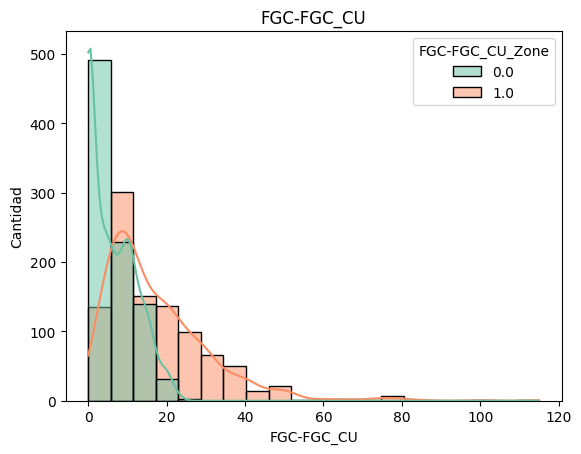

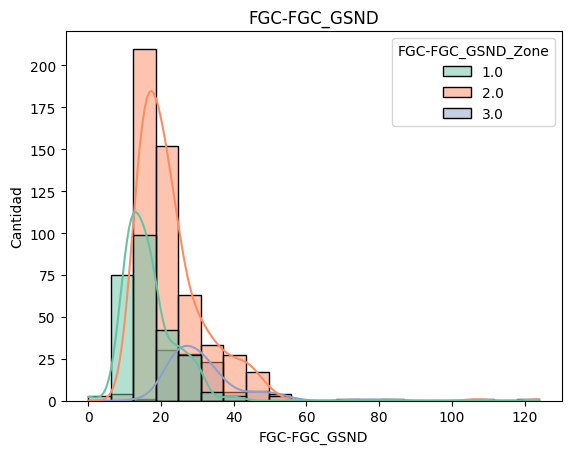

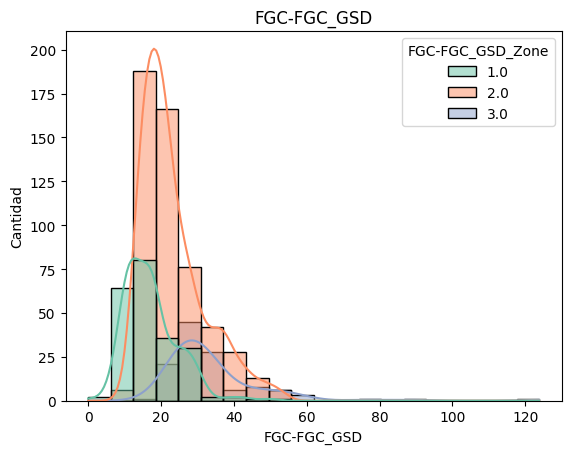

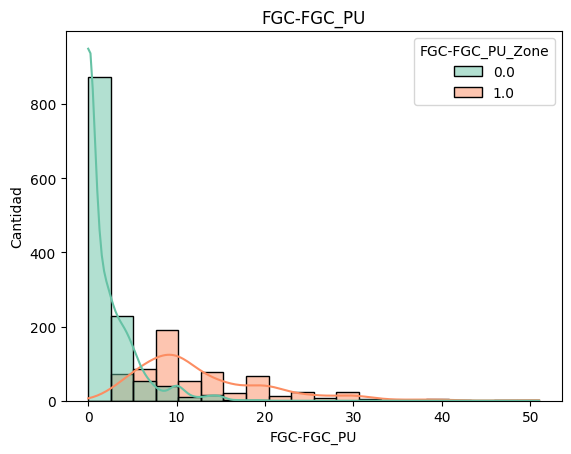

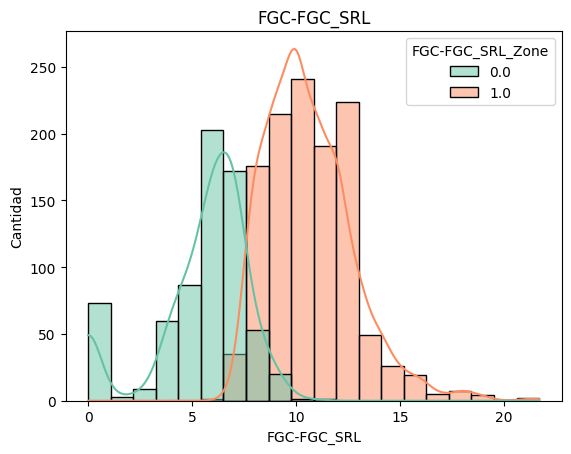

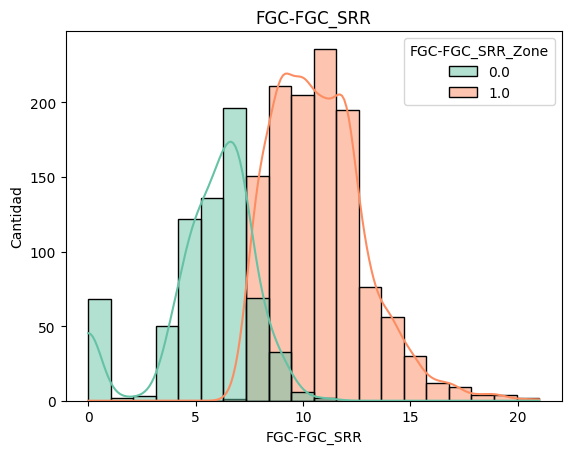

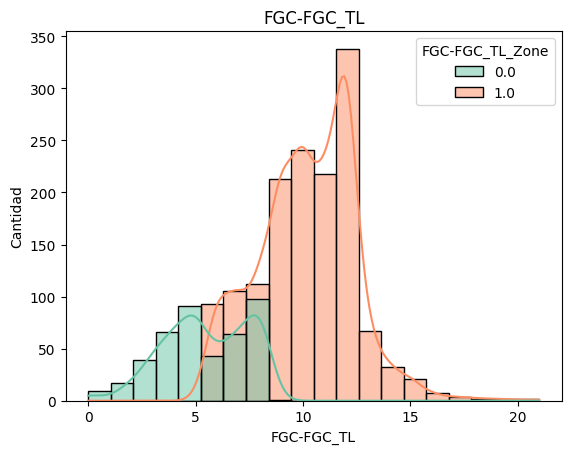

In [15]:
for measure, zone in zip(FGC_measures, FGC_measures_zone):
  sns.histplot(
    data=train_supervized,
    x=measure,
    hue=zone,
    bins=20,
    palette='Set2',
    kde=True
    )
  plt.title(f'{measure}')
  plt.xlabel(measure)
  plt.ylabel('Cantidad')

  plt.show()

Se puede observar que hay categorías que se empalman. Esto, en teoría, tiene sentido, ya que, además del desempeño en las pruebas, el **sexo** y la **edad** también influyen en el resultado. 

Podemos realizar un análisis más detallado observando los rangos de **edad** y **género** para comprender mejor cómo estas variables afectan el rendimiento y las categorías en las que se agrupan los datos.


In [ ]:
# TODO: Falta explicar

fgc_data_dict = data_dict[data_dict['Instrument'] == 'FitnessGram Child']

fgc_columns = []

for index, row in fgc_data_dict.iterrows():
    if '_Zone' not in row['Field']:
        measure_field = row['Field']
        measure_desc = row['Description']

        zone_field = measure_field + '_Zone'
        zone_row = fgc_data_dict[fgc_data_dict['Field'] == zone_field]

        if not zone_row.empty:
            zone_desc = zone_row['Description'].values[0]
            fgc_columns.append((measure_field, zone_field, measure_desc, zone_desc))

In [ ]:
# TODO: Falta explicar

results_male = []

for measure, zone, _, _ in fgc_columns:
    sorted_zones = sorted(train_supervized[zone].dropna().unique())
    for zone_value in sorted_zones:
        age_sex_data_by_zone = train_supervized[train_supervized[zone] == zone_value][
            ['Basic_Demos-Age', 'Basic_Demos-Sex', measure]
        ]
        unique_ages = age_sex_data_by_zone['Basic_Demos-Age'].dropna().unique()

        for age in sorted(unique_ages):
            age_sex_data = age_sex_data_by_zone[
                (age_sex_data_by_zone['Basic_Demos-Age'] == age) &
                (age_sex_data_by_zone['Basic_Demos-Sex'] == 0)
            ][measure]

            if not age_sex_data.empty:
                min_val, max_val = age_sex_data.min(), age_sex_data.max()
                results_male.append({
                    'Age': age,
                    'Sex': 'Male',
                    'Zone': zone_value,
                    'Measure': measure,
                    'Min-Max': f'{min_val} - {max_val}'
                })

df_male = pd.DataFrame(results_male).pivot_table(
    index=['Age', 'Sex', 'Zone'], columns='Measure', values='Min-Max', aggfunc='first'
)

df_male

Measure         FGC-FGC_CU   FGC-FGC_GSD  FGC-FGC_GSND   FGC-FGC_PU   
Age Sex  Zone                                                         
5   Male 0.0     0.0 - 1.0           NaN           NaN    0.0 - 2.0  \
         1.0    2.0 - 13.0           NaN           NaN    4.0 - 8.0   
6   Male 0.0     0.0 - 1.0           NaN           NaN    0.0 - 2.0   
         1.0    2.0 - 40.0           NaN           NaN   3.0 - 20.0   
7   Male 0.0     0.0 - 3.0           NaN           NaN    0.0 - 3.0   
         1.0    2.0 - 26.0           NaN           NaN   3.0 - 24.0   
8   Male 0.0     0.0 - 5.0           NaN           NaN    0.0 - 4.0   
         1.0    4.0 - 24.0           NaN           NaN   4.0 - 32.0   
9   Male 0.0    0.0 - 10.0           NaN           NaN    0.0 - 5.0   
         1.0    6.0 - 43.0           NaN           NaN   5.0 - 30.0   
         2.0           NaN   13.3 - 13.3   12.7 - 12.7          NaN   
10  Male 0.0    0.0 - 11.0           NaN           NaN    0.0 - 6.0   
         1.0    9.0 - 75.0    6.2 - 16.1    6.1 - 15.1   6.0 - 37.0   
         2.0           NaN   12.7 - 44.0   12.6 - 34.0          NaN   
         3.0           NaN   25.9 - 29.3   22.9 - 50.2          NaN   
11  Male 0.0    0.0 - 14.0           NaN           NaN    0.0 - 7.0   
         1.0   12.0 - 50.0    6.3 - 21.6    8.6 - 24.4   7.0 - 31.0   
         2.0           NaN   12.8 - 35.4   12.7 - 49.0          NaN   
         3.0           NaN   22.5 - 53.6   23.0 - 27.1          NaN   
12  Male 0.0    0.0 - 17.0           NaN           NaN    0.0 - 9.0   
         1.0   15.0 - 45.0    9.9 - 40.6    9.9 - 41.8   8.0 - 30.0   
         2.0           NaN   13.3 - 49.0   12.6 - 48.2          NaN   
         3.0           NaN   22.9 - 46.8   23.5 - 41.7          NaN   
13  Male 0.0    0.0 - 20.0           NaN           NaN   0.0 - 19.0   
         1.0   18.0 - 80.0   11.3 - 19.2    8.9 - 19.3  10.0 - 40.0   
         2.0           NaN   19.1 - 31.2   18.1 - 30.8          NaN   
         3.0           NaN   32.5 - 39.1   31.6 - 39.1          NaN   
14  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 12.0   
         1.0   24.0 - 80.0   12.8 - 28.3   11.5 - 27.2  13.0 - 37.0   
         2.0           NaN   19.7 - 42.9   20.3 - 44.2          NaN   
         3.0           NaN   31.5 - 75.8   31.8 - 81.8          NaN   
15  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 14.0   
         1.0   24.0 - 85.0    0.0 - 43.4    0.0 - 39.4  15.0 - 49.0   
         2.0           NaN   22.6 - 43.4   17.5 - 43.6          NaN   
         3.0           NaN   28.1 - 49.6   33.6 - 47.1          NaN   
16  Male 0.0    0.0 - 21.0           NaN           NaN   0.0 - 15.0   
         1.0   24.0 - 64.0   16.1 - 32.3   15.3 - 31.6  16.0 - 39.0   
         2.0           NaN   29.2 - 47.9   21.6 - 46.6          NaN   
         3.0           NaN   46.6 - 57.6   47.4 - 47.4          NaN   
17  Male 0.0    5.0 - 22.0           NaN           NaN   0.0 - 15.0   
         1.0   24.0 - 78.0   11.1 - 32.3   12.4 - 31.9  18.0 - 47.0   
         2.0           NaN   17.8 - 50.9  30.4 - 106.4          NaN   
         3.0           NaN  34.4 - 123.8   33.3 - 53.7          NaN   
18  Male 0.0    4.0 - 19.0           NaN           NaN   5.0 - 14.0   
         1.0   25.0 - 40.0           NaN   28.4 - 31.6  25.0 - 51.0   
         2.0           NaN   33.2 - 52.0   32.8 - 42.1          NaN   
         3.0           NaN   28.4 - 28.4   23.4 - 52.7          NaN   
20  Male 0.0           NaN           NaN           NaN  17.0 - 17.0   
         1.0   34.0 - 34.0           NaN           NaN          NaN   
         3.0           NaN   56.8 - 56.8   52.5 - 52.5          NaN   

Measure        FGC-FGC_SRL  FGC-FGC_SRR   FGC-FGC_TL  
Age Sex  Zone                                         
5   Male 0.0     4.0 - 7.0    5.0 - 6.5    0.0 - 5.0  
         1.0    8.0 - 16.5   8.0 - 17.0   5.5 - 13.0  
6   Male 0.0     0.0 - 7.0    0.0 - 7.2    0.0 - 5.0  
         1.0    7.5 - 18.0   7.5

Como se puede observar, generalmente la zona se empalma sin importar las consideraciones establecidas. Esto sugiere que puede ser una mejor idea **eliminar estas columnas** para reducir el ruido al entrenar el modelo.

Alternativamente, se podría utilizar alguna métrica preestablecida para **asignar estos valores** de manera más precisa y coherente, de forma que no afecten negativamente el desempeño del modelo.

<Axes: >

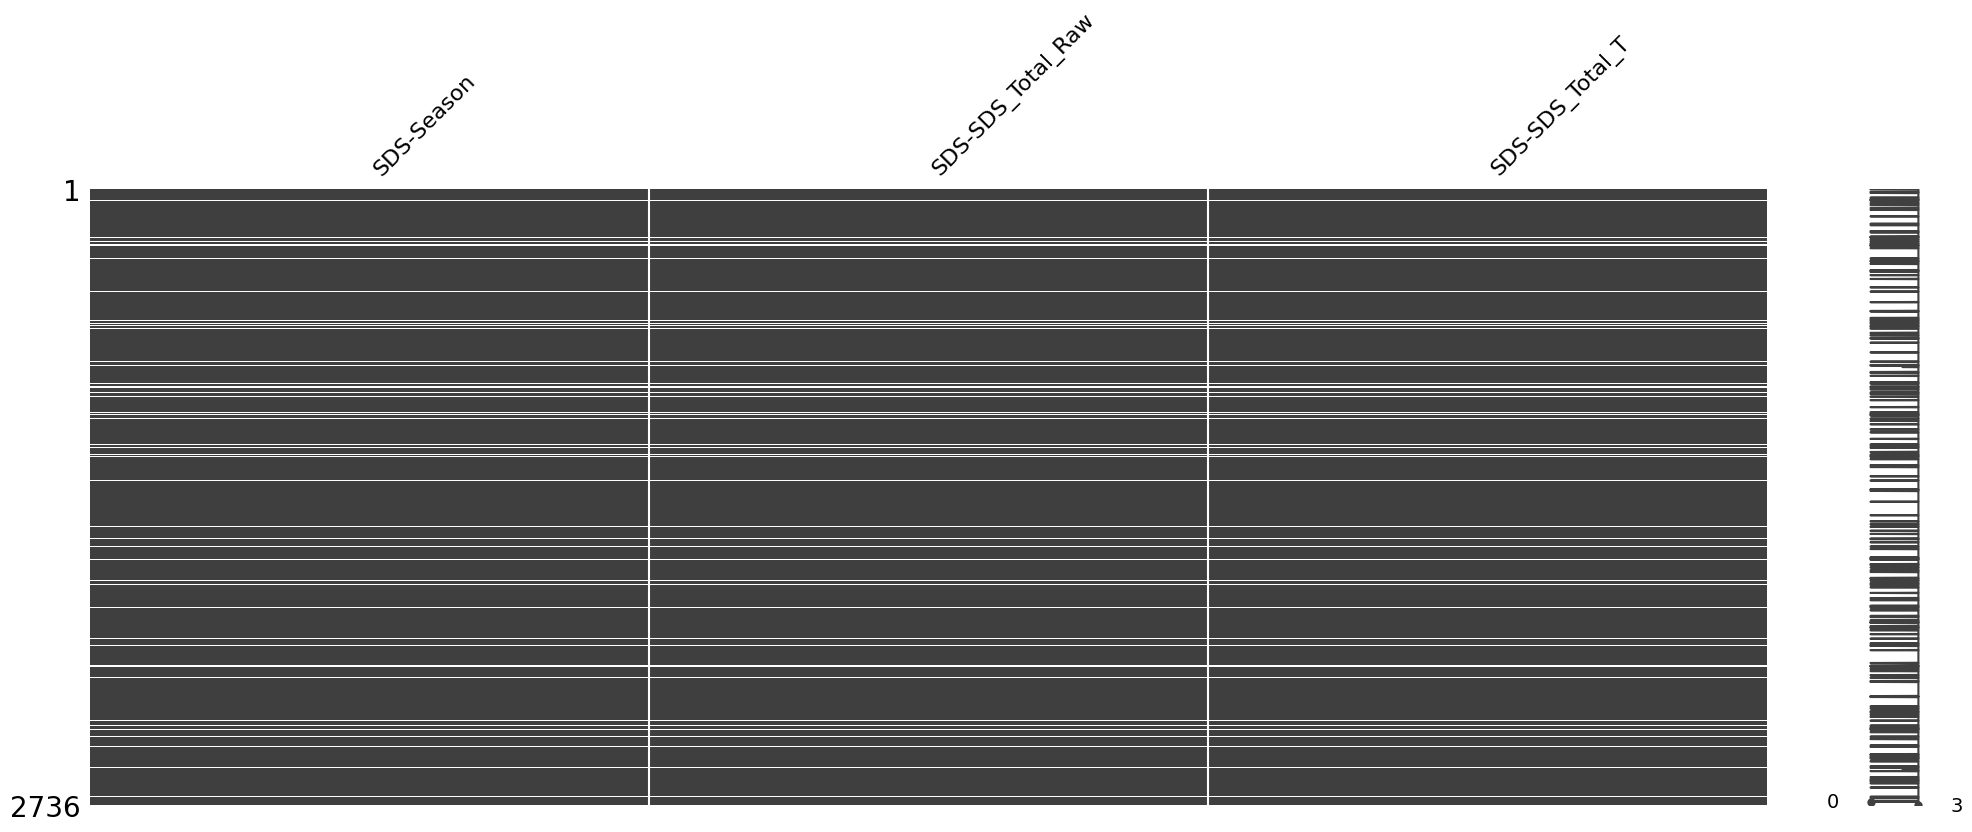

In [16]:
msno.matrix(train_supervized[SDS], figsize=(24,8))

#### Trastornos del Sueño (Descripción y Análisis)

Los **trastornos del sueño** son condiciones que afectan la calidad y cantidad del sueño, lo cual puede influir en la salud física y mental. En nuestro conjunto de datos, los trastornos del sueño están representados por varias métricas que indican la calidad del descanso de los individuos.

Dado que hay pocos valores perdidos y para evitar reducir el tamaño de nuestros datos, es posible realizar una **imputación por medio de la media**. Esto nos permitirá llenar los valores faltantes sin afectar significativamente la integridad del conjunto de datos.


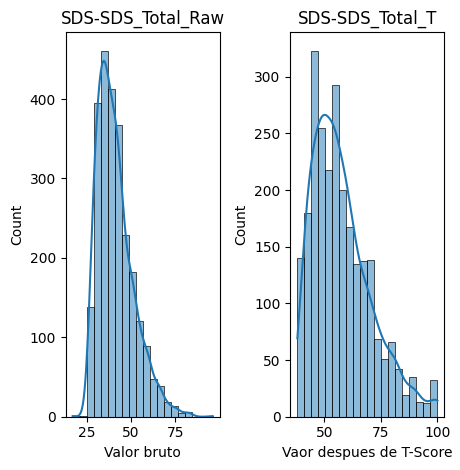

In [32]:
plt.subplot(1, 3, 2)
sns.histplot(train_supervized['SDS-SDS_Total_Raw'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_Raw')
plt.xlabel('Valor bruto')

plt.subplot(1, 3, 3)
sns.histplot(train_supervized['SDS-SDS_Total_T'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_T')
plt.xlabel('Vaor despues de T-Score')

plt.tight_layout()
plt.show()

Para este proyecto, utilizaremos la **Total_T**, ya que esta se encuentra **estandarizada**. Además, podemos aprovechar el hecho de que está estandarizada con una **media de 50** y una **desviación estándar de 10**, lo que nos permitirá asignar un valor de **50** a los valores nulos. De esta manera, mantenemos la coherencia en los datos y minimizamos el impacto de los valores faltantes.


### 4.2 Análisis de impedancia bioeléctrica

In [ ]:
# Columnas correspondientes

BIA_mesures = ["BIA-BIA_Activity_Level_num",
    "BIA-BIA_BMC",
    "BIA-BIA_BMI",
    "BIA-BIA_BMR",
    "BIA-BIA_DEE",
    "BIA-BIA_ECW",
    "BIA-BIA_FFM",
    "BIA-BIA_FFMI",
    "BIA-BIA_FMI",
    "BIA-BIA_Fat",
    "BIA-BIA_Frame_num",
    "BIA-BIA_ICW",
    "BIA-BIA_LDM",
    "BIA-BIA_LST",
    "BIA-BIA_SMM",
    "BIA-BIA_TBW"]

<Axes: >

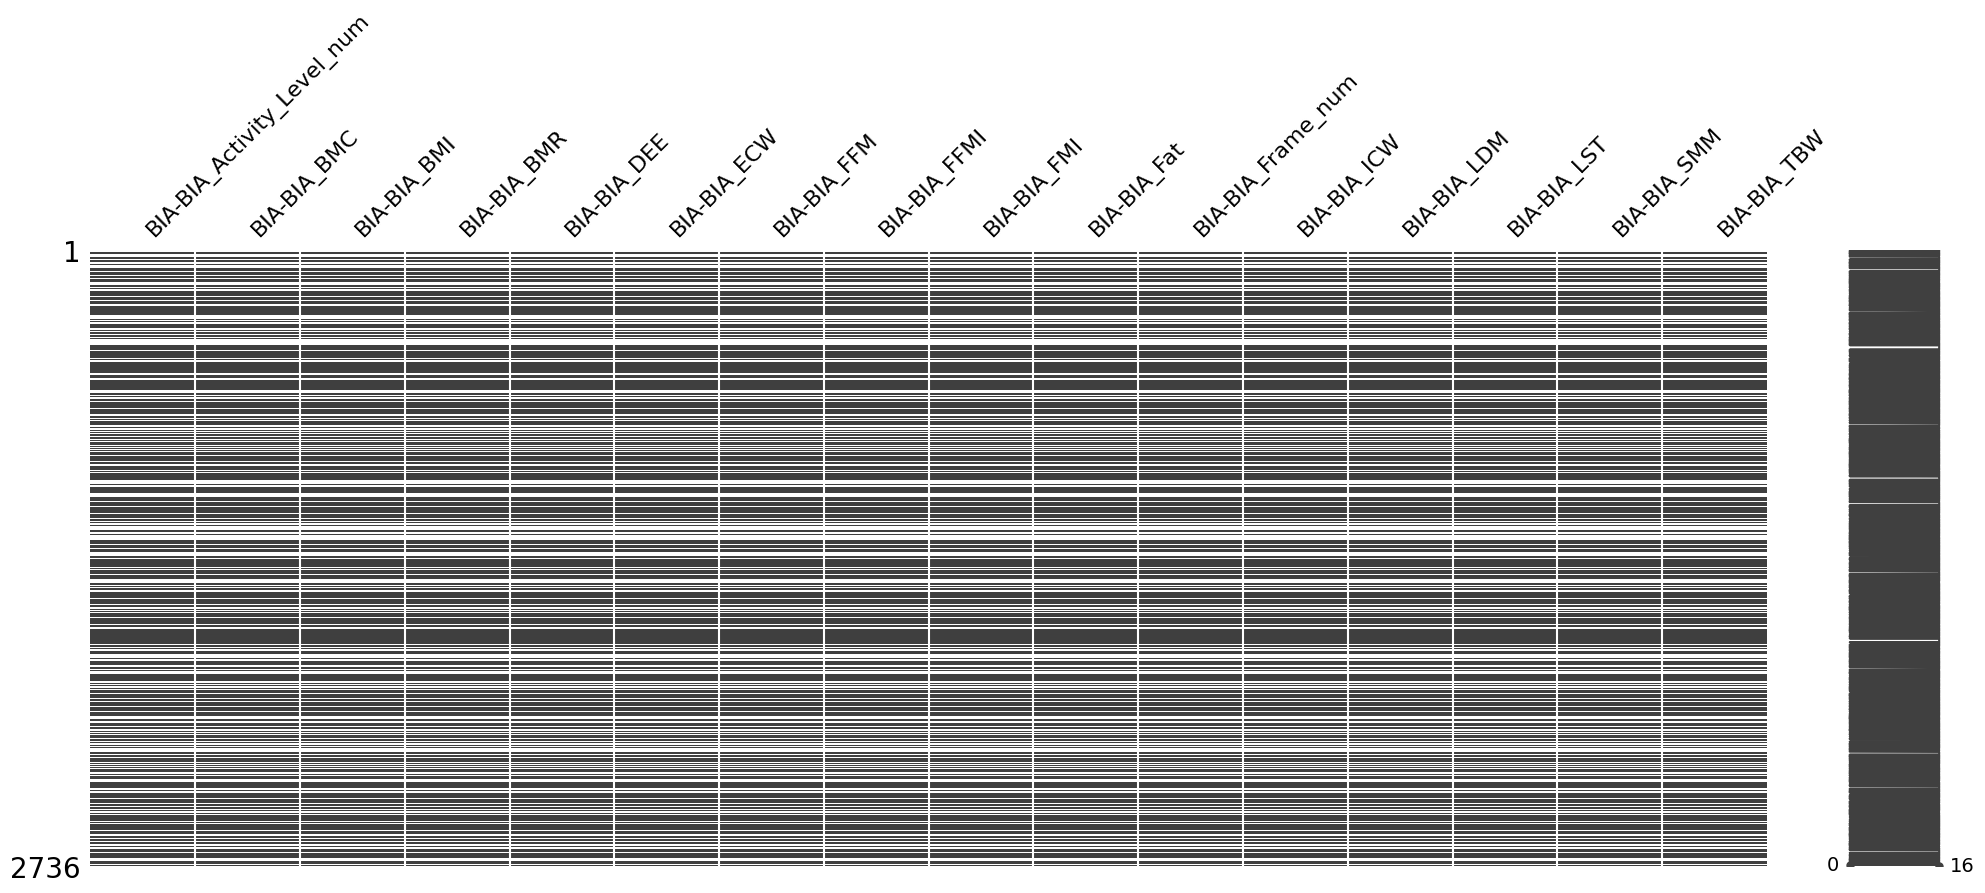

In [ ]:
msno.matrix(train_supervized[BIA_mesures], figsize=(24,8))

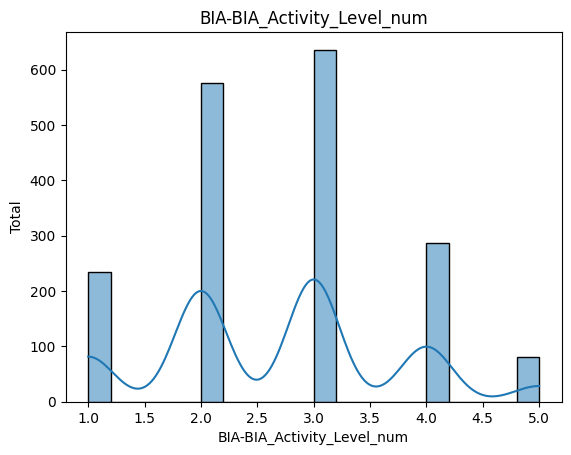

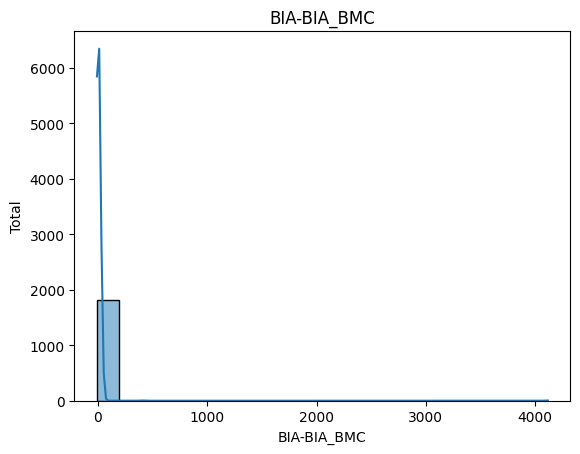

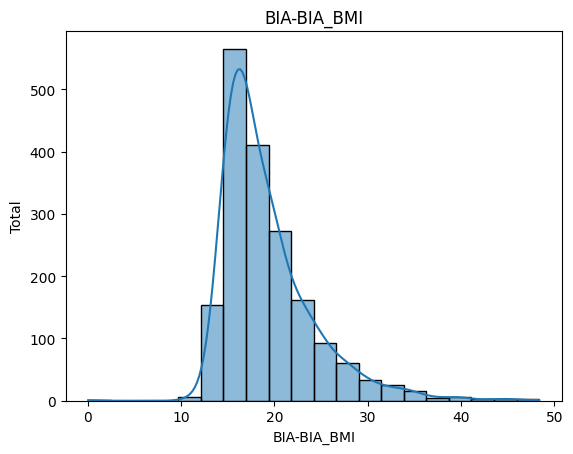

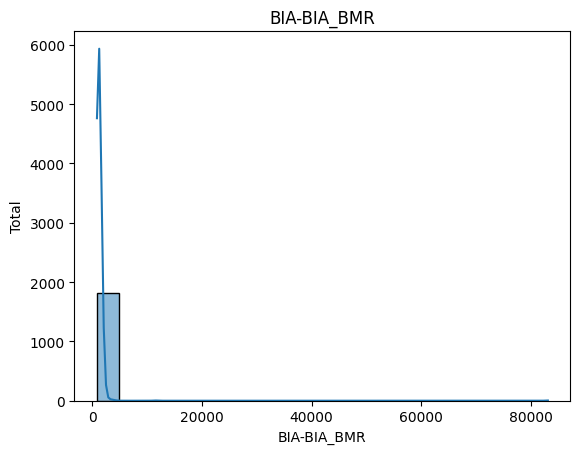

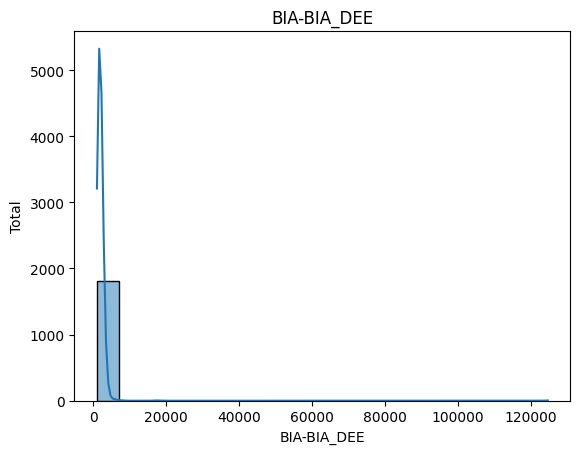

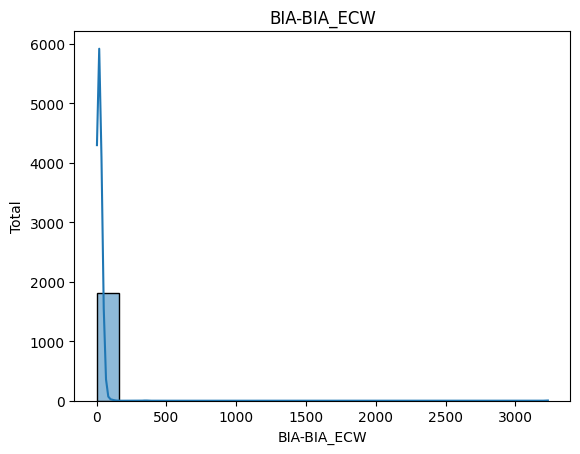

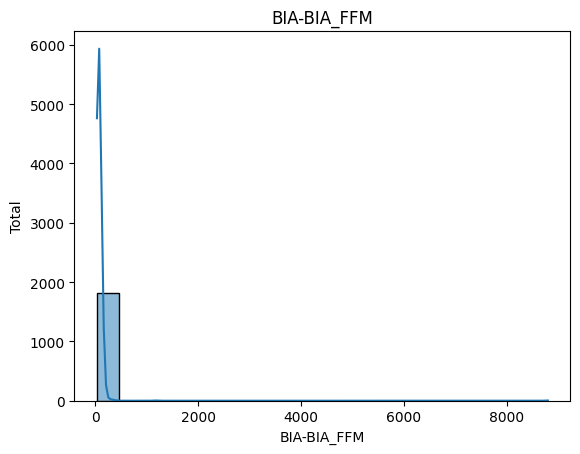

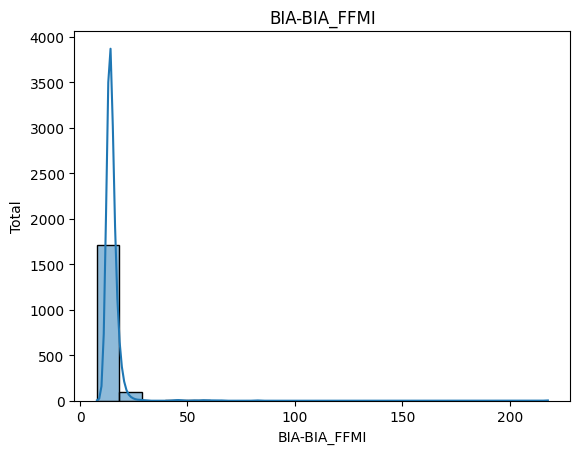

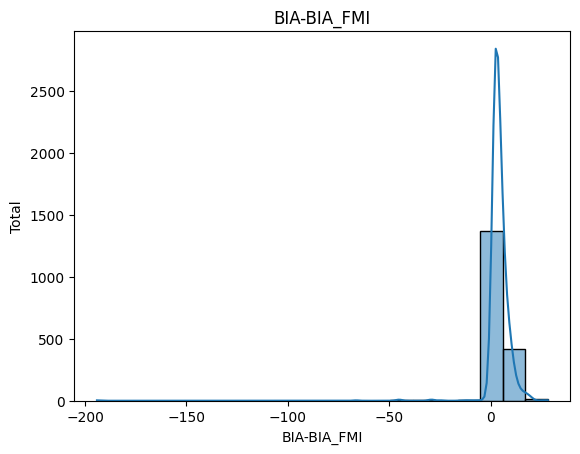

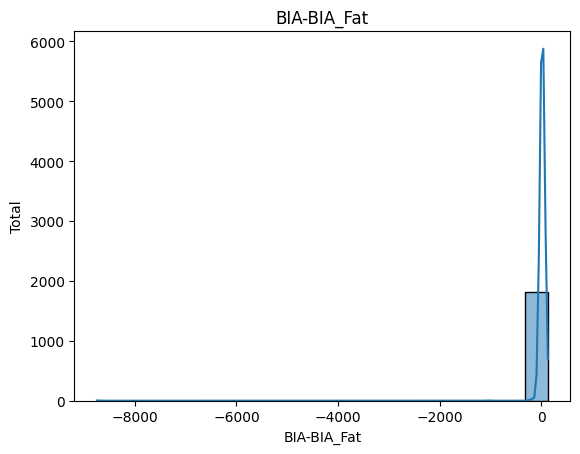

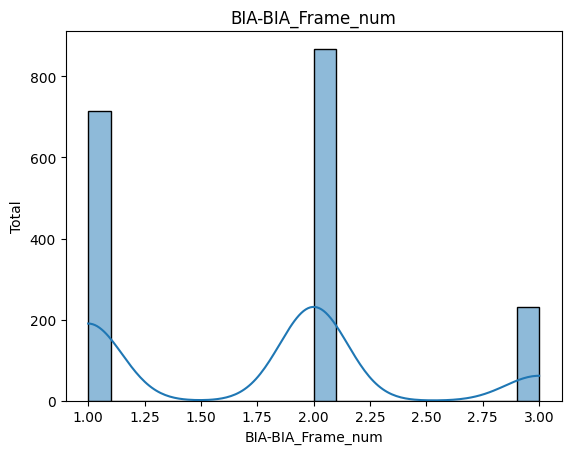

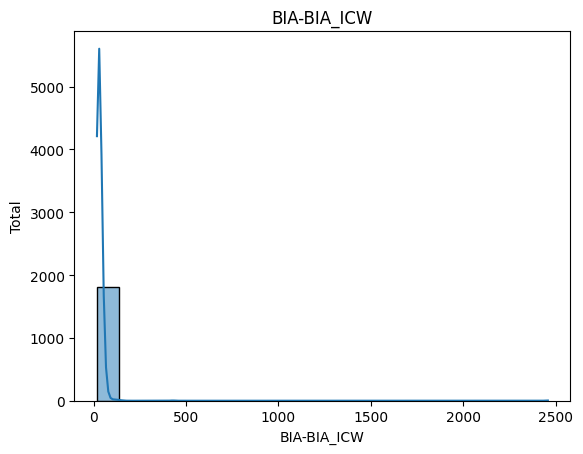

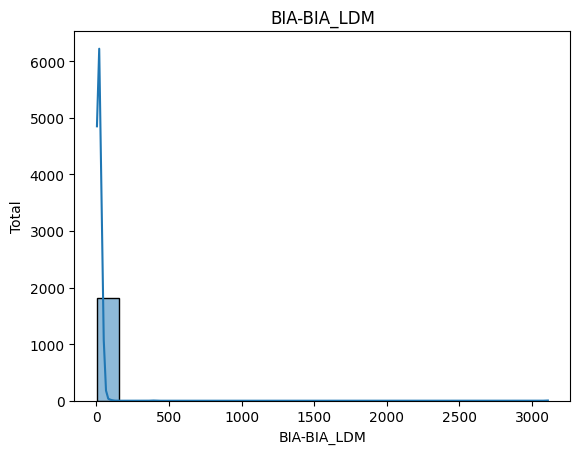

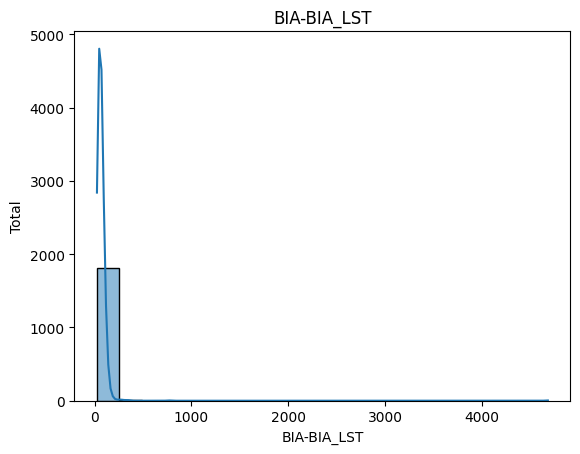

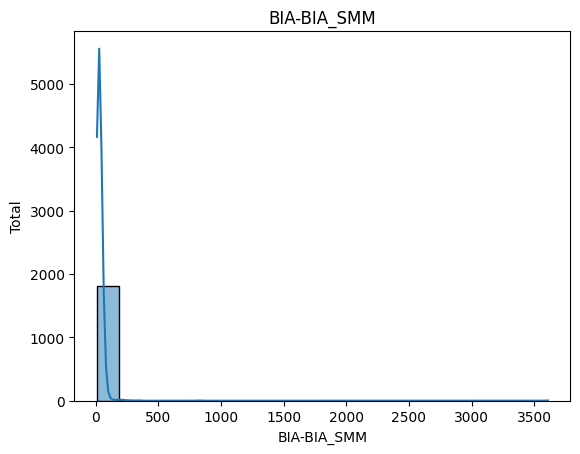

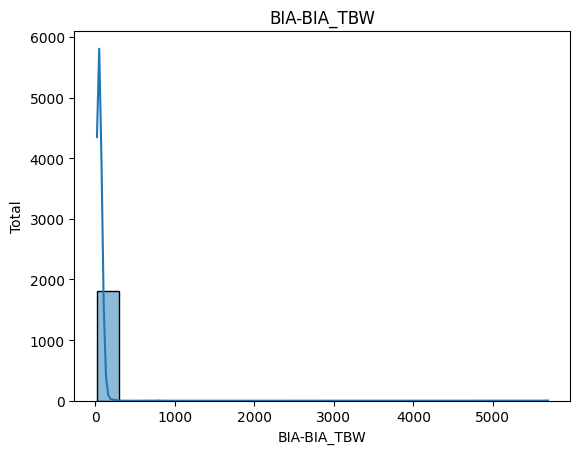

In [ ]:
for measure in BIA_mesures:
    sns.histplot(data=train_supervized, x=measure, bins=20, kde=True)
    plt.title(f'{measure}')
    plt.xlabel(measure)
    plt.ylabel('Total')
    plt.show()

Existen muchos **valores faltantes** y **valores repetidos** en el conjunto de datos, especialmente en variables como el **nivel de actividad** y el **BMI**. Además, las distribuciones muestran que muchos de estos datos no son útiles para el modelo, por lo que podemos optar por **no usarlos**.

Sin embargo, hay algunas columnas que podrían ser útiles para el entrenamiento, como las relacionadas con el **Frame** (estructura física) y el **nivel de actividad**. 

Una posible mejora sería combinar el **nivel de actividad** con los resultados del **cuestionario** para obtener un **promedio** y crear una nueva característica que integre ambos datos. Esto podría ofrecer una representación más completa y precisa del nivel de actividad, mejorando la calidad de las predicciones del modelo.


### 4.3 Demografía, Escala de evaluación global de los niños, Físico, Cuestionario de actividad física para adolescentes y niños

In [ ]:
# TODO: Mejorar el nombre de las variables ???
demogr_measures = ["Basic_Demos-Enroll_Season",
                   "Basic_Demos-Age",
                   "Basic_Demos-Sex",]

physical_measures = ["Physical-BMI",
                     "Physical-Height",
                     "Physical-Weight",
                     "Physical-Waist_Circumference",
                     "Physical-Diastolic_BP",
                     "Physical-HeartRate",
                     "Physical-Systolic_BP"]

fitness_measures = ["Fitness_Endurance-Season",
                "Fitness_Endurance-Max_Stage",
                "Fitness_Endurance-Time_Mins",
                "Fitness_Endurance-Time_Sec"]

# TODO: Comentar que es exactamente estas variables
PAQ_A = ["PAQ_A-Season",
         "PAQ_A-PAQ_A_Total",]

# TODO: Comentar que es exactamente estas variables
PAQ_C = ["PAQ_C-Season",
         "PAQ_C-PAQ_C_Total"]

# Variables relacionadas la actividad física para adolescentes y niños
bp_hr_cols = [
    'Physical-Diastolic_BP', 
    'Physical-Systolic_BP',
    'Physical-HeartRate'
]

### Definición de la características (CGAS):

La **Children’s Global Assessment Scale** (CGAS), adaptada de la **Global Assessment Scale** para adultos, es una evaluación del funcionamiento general de niños y jóvenes de 4 a 16 años. El clínico evalúa una serie de aspectos del funcionamiento psicológico y social, y otorga un puntaje único entre 1 y 100, basado en el nivel más bajo de funcionamiento del niño o joven. 

El puntaje los clasifica en una de diez categorías, que van desde **"necesita supervisión constante"** (1-10) hasta **"funcionamiento superior"** (91-100). Esta medida puede ser utilizada tanto por clínicos como por investigadores para complementar otras escalas que miden síntomas más específicos.


In [28]:
CGAS = ["CGAS-Season",
        "CGAS-CGAS_Score"]

#### Demogarfía

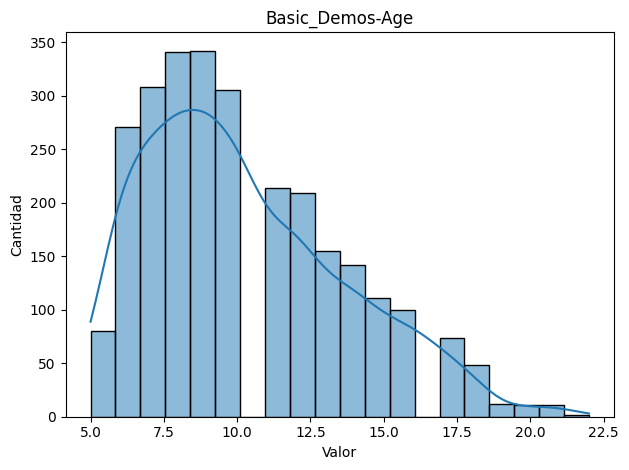

In [29]:
plt.subplot(1, 1, 1)
sns.histplot(train_supervized['Basic_Demos-Age'].dropna(), bins=20, kde=True)
plt.title('Basic_Demos-Age')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

Los **datos demográficos** son de los más importantes, ya que muchos otros datos están directamente relacionados con estos. 

Se puede observar, de manera esperada, que la gráfica de **edad** tiene una **cola larga**, debido a que los datos están más centrados en niños.


#### Escala de evaluación global de los niños

In [30]:
train_supervized[CGAS].isna().sum() * 100 / len(train_supervized)

CGAS-Season        14.400585
CGAS-CGAS_Score    14.400585
dtype: float64

<Axes: >

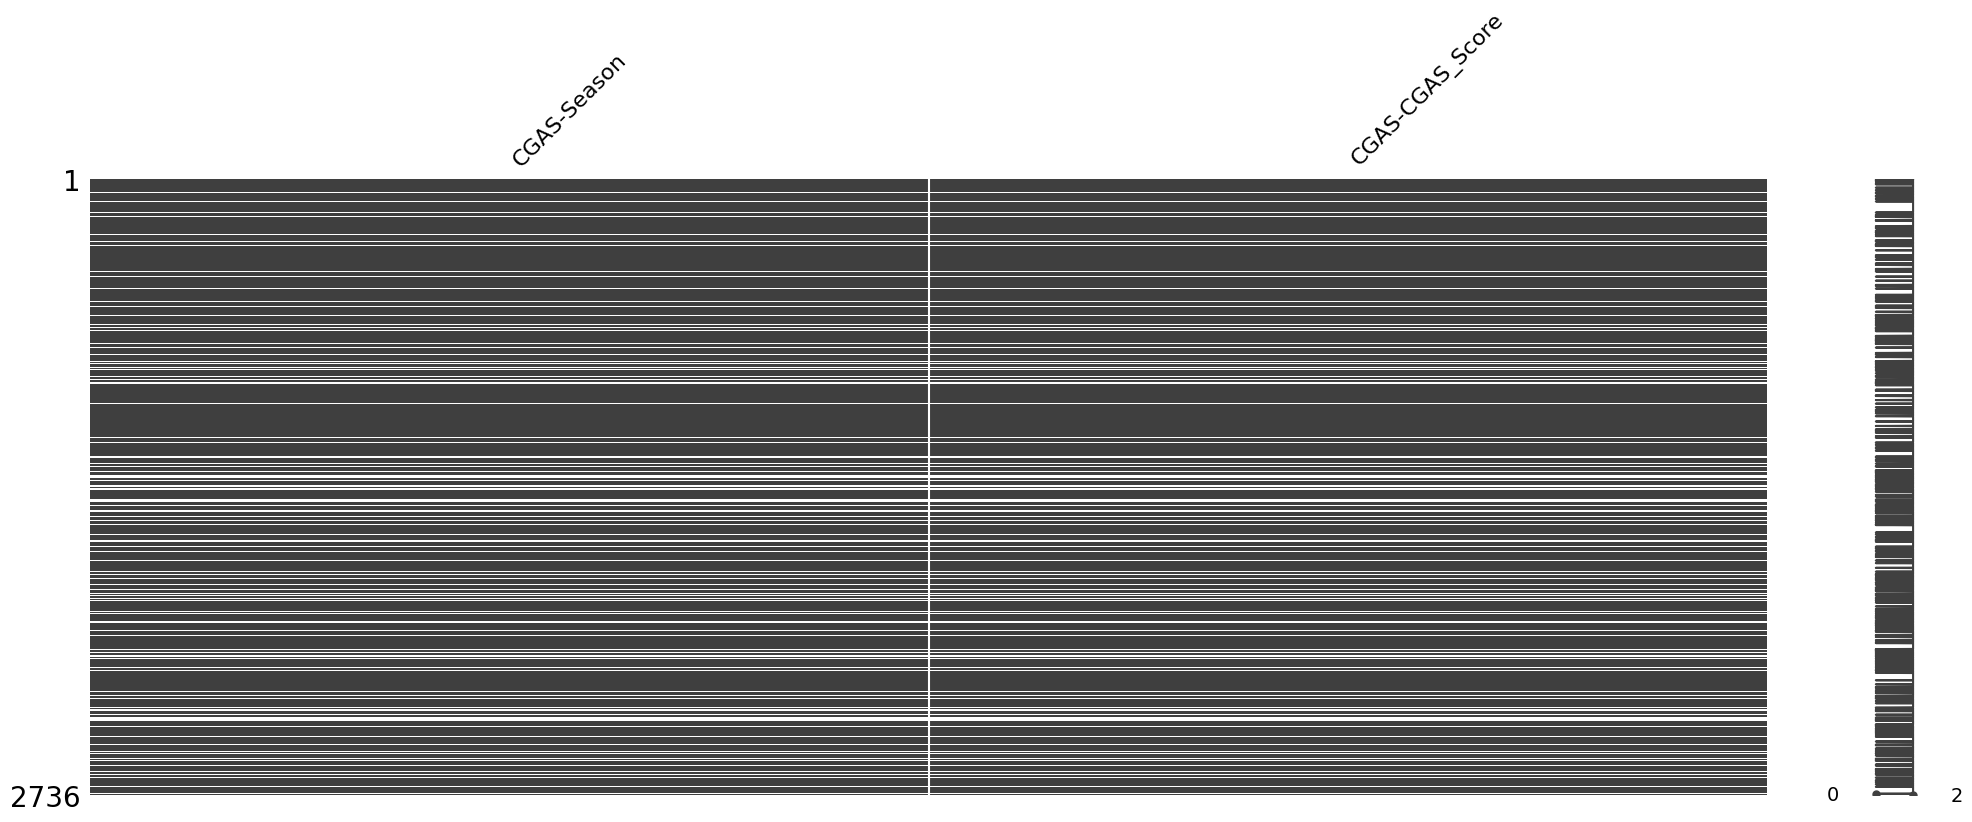

In [31]:
msno.matrix(train_supervized[CGAS], figsize=(24,8))

El **14%** de los datos están faltantes. Los datos están **estandarizados** en un rango del **1 al 100**. 

Existen dos opciones para manejar los valores faltantes:
1. **Eliminar estos renglones**, descartando los datos incompletos.
2. Realizar una **imputación**, ya sea utilizando la **media** de los valores o asignando algún valor dentro del **rango establecido** (1-100).


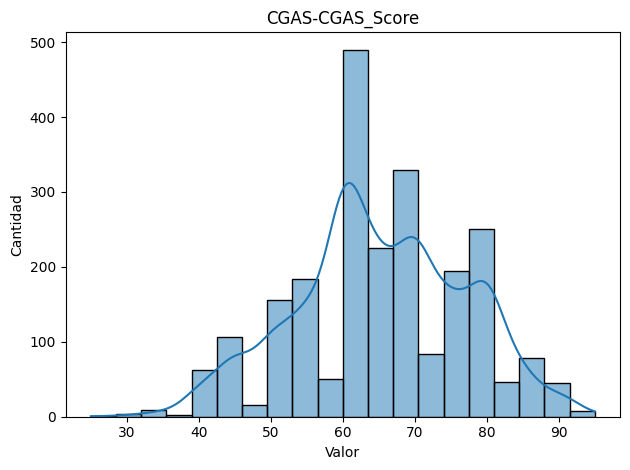

In [32]:
plt.subplot(1, 1, 1)
sns.histplot(train_supervized['CGAS-CGAS_Score'].dropna(), bins=20, kde=True)
plt.title('CGAS-CGAS_Score')
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

#### Físico

In [33]:
train_supervized[physical_measures].isna().sum() * 100 / len(train_supervized)

Physical-BMI                     7.638889
Physical-Height                  7.529240
Physical-Weight                  5.994152
Physical-Waist_Circumference    82.346491
Physical-Diastolic_BP            9.429825
Physical-HeartRate               9.137427
Physical-Systolic_BP             9.429825
dtype: float64

<Axes: >

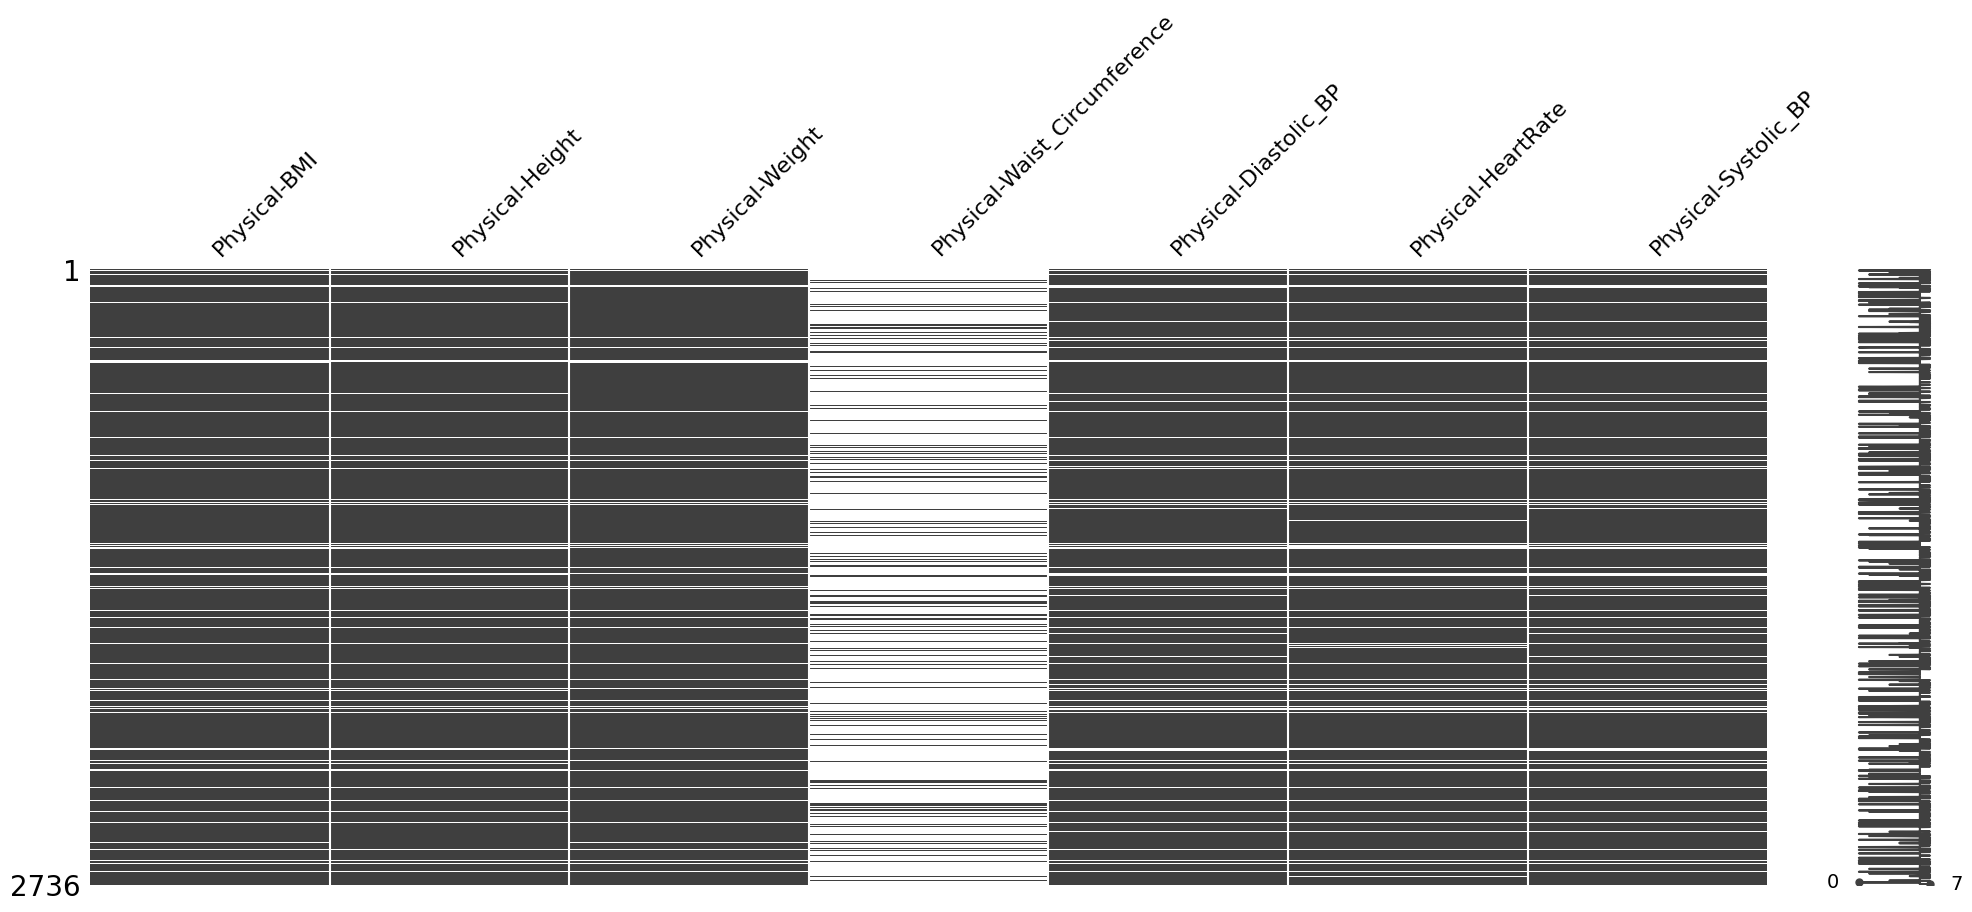

In [34]:
msno.matrix(train_supervized[physical_measures], figsize=(24,8))

In [35]:
(train_supervized[physical_measures] == 0).sum()

Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 52
Physical-Waist_Circumference     0
Physical-Diastolic_BP            0
Physical-HeartRate               0
Physical-Systolic_BP             0
dtype: int64

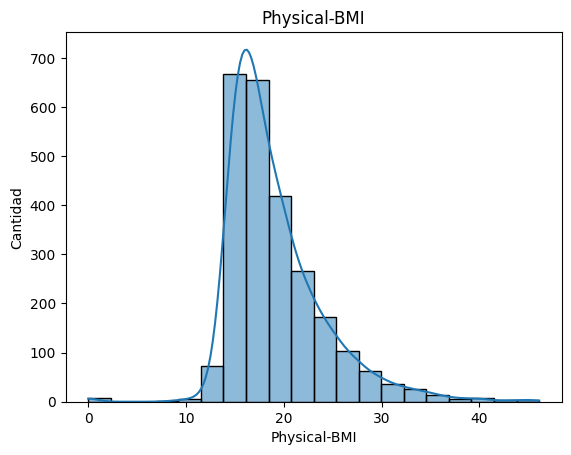

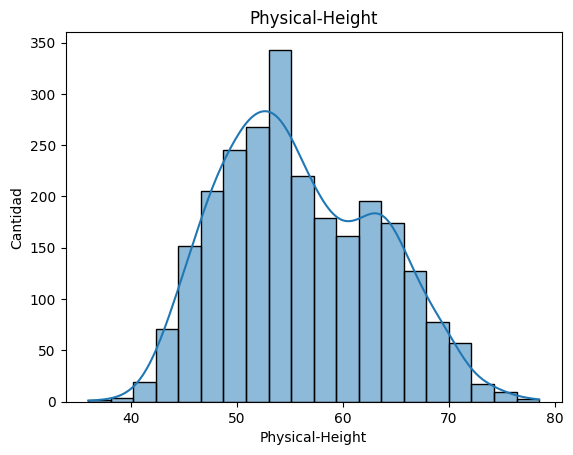

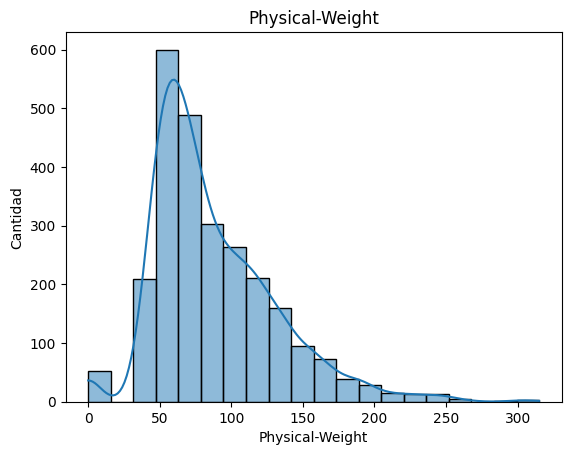

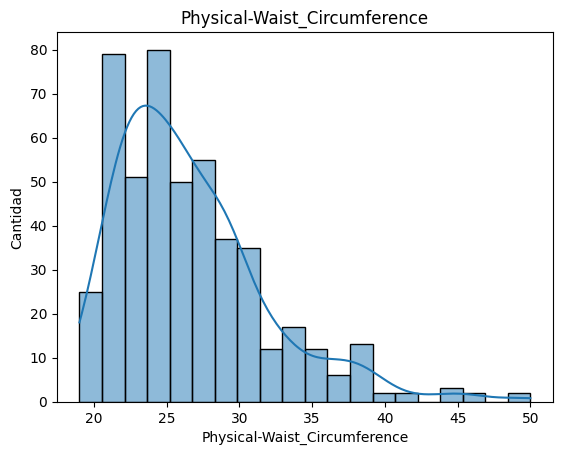

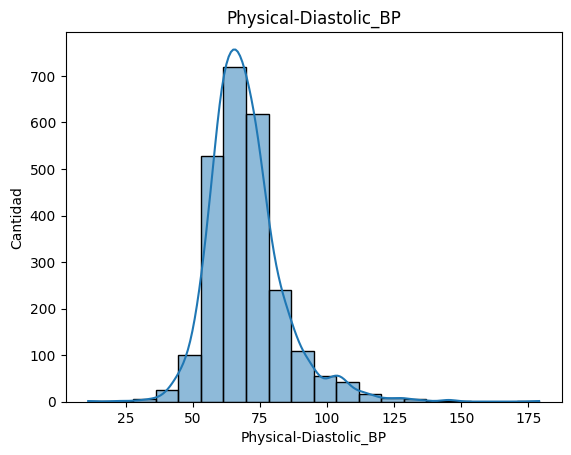

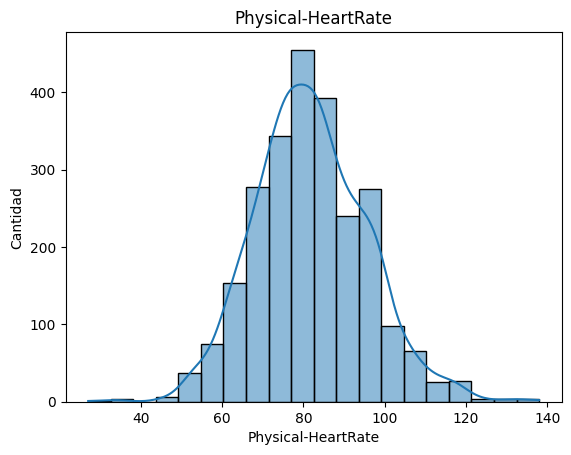

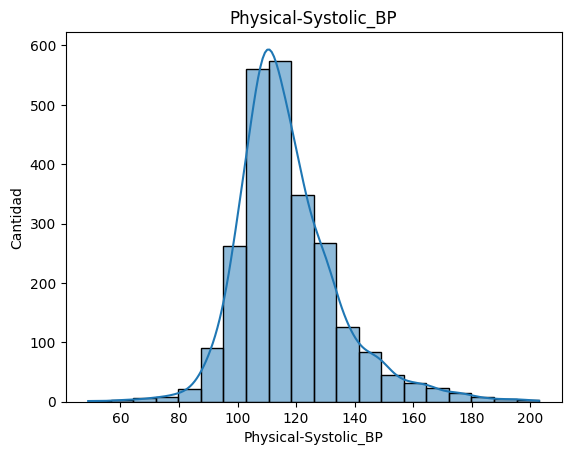

In [36]:
for measure in physical_measures:
    sns.histplot(data=train_supervized, x=measure, bins=20, kde=True)
    plt.title(f'{measure}')
    plt.xlabel(measure)
    plt.ylabel('Cantidad')
    plt.show()

#### Cuestionario de actividad física para adolescentes y niños
Checamos si hay valores letales o incongruentes en el dataset

In [37]:
(train_supervized[bp_hr_cols] < 50).sum()

Physical-Diastolic_BP    78
Physical-Systolic_BP      1
Physical-HeartRate       10
dtype: int64

In [38]:
train_supervized[train_supervized['Physical-Systolic_BP'] <= train_supervized['Physical-Diastolic_BP']][bp_hr_cols] 

,Physical-Diastolic_BP,Physical-Systolic_BP,Physical-HeartRate
1140,179.0,139.0,103.0
1879,117.0,114.0,114.0


Según las pautas actuales, la **presión arterial normal** se define como:
- Un valor **sistólico** inferior a **120 milímetros de mercurio (mm Hg)**.
- Un valor **diastólico** inferior a **80 mm Hg**.

Hay valores no realistas para el BMI y el peso.

In [ ]:
train_supervized[fitness_measures].isna().sum() * 100 / len(train_supervized)

Fitness_Endurance-Season       53.947368
Fitness_Endurance-Max_Stage    73.282164
Fitness_Endurance-Time_Mins    73.391813
Fitness_Endurance-Time_Sec     73.391813
dtype: float64

<Axes: >

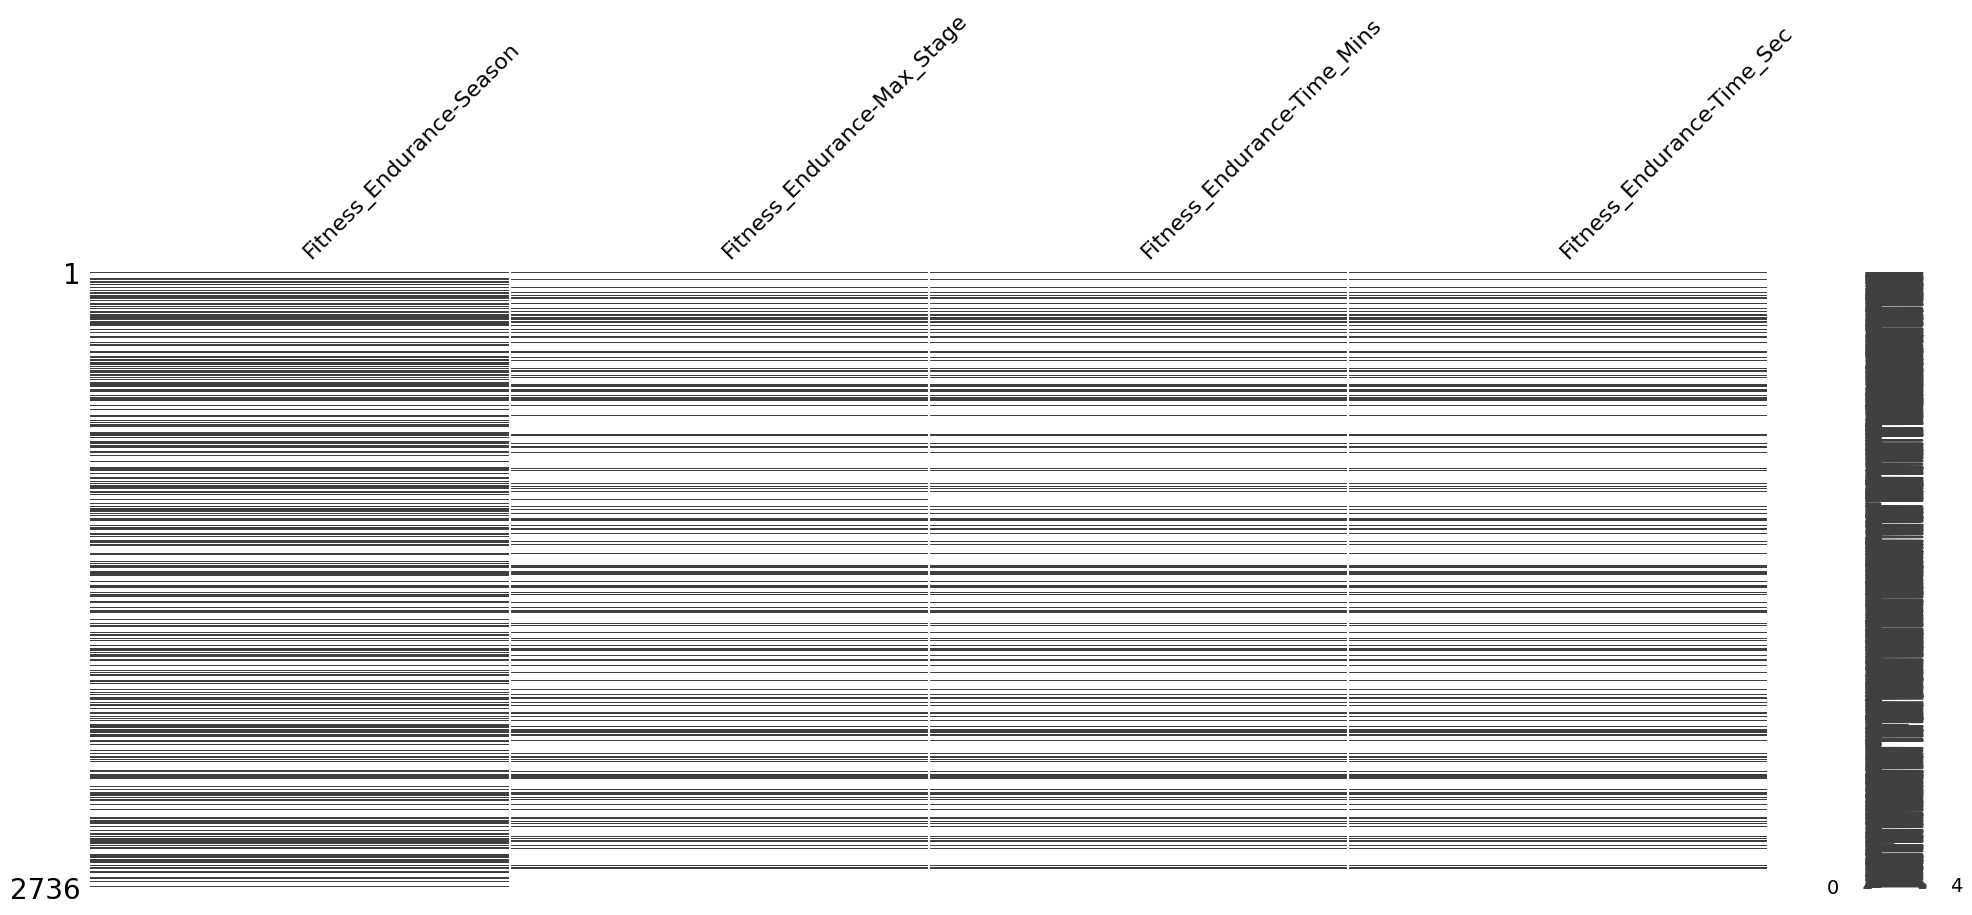

In [ ]:
msno.matrix(train_supervized[fitness_measures], figsize=(24,8))

Dado que hay más del **80%** de datos faltantes, se decidirá **no utilizar** estas características en el análisis.

# TODO: Explicar que es el PAQ_A

In [43]:
train_supervized[PAQ_A].isna().sum() * 100 / len(train_supervized)

PAQ_A-Season         86.732456
PAQ_A-PAQ_A_Total    86.732456
dtype: float64

<Axes: >

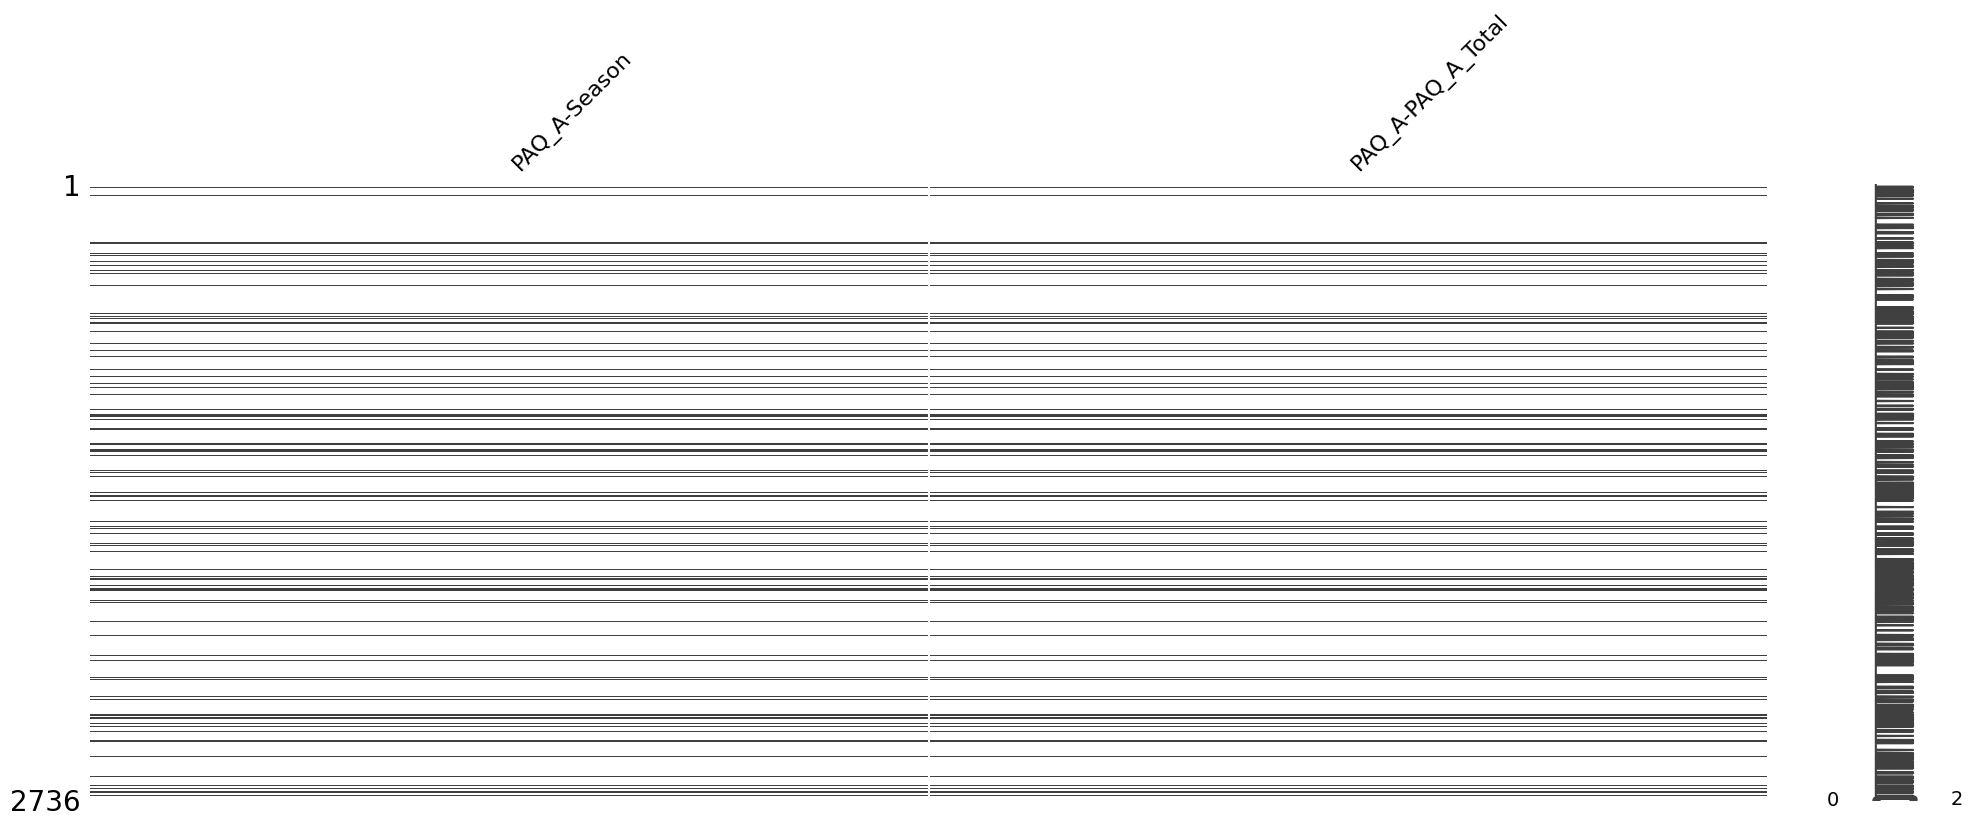

In [44]:
msno.matrix(train_supervized[PAQ_A], figsize=(24,8))

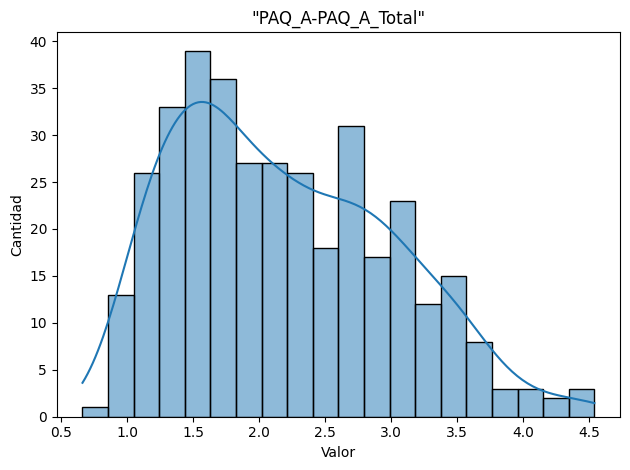

In [45]:
plt.subplot(1, 1, 1)
sns.histplot(train_supervized["PAQ_A-PAQ_A_Total"].dropna(), bins=20, kde=True)
plt.title('"PAQ_A-PAQ_A_Total"')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

# TODO: Explicar que es el PAQ_C

In [46]:
train_supervized[PAQ_C].isna().sum() * 100 / len(train_supervized)

PAQ_C-Season         47.368421
PAQ_C-PAQ_C_Total    47.368421
dtype: float64

<Axes: >

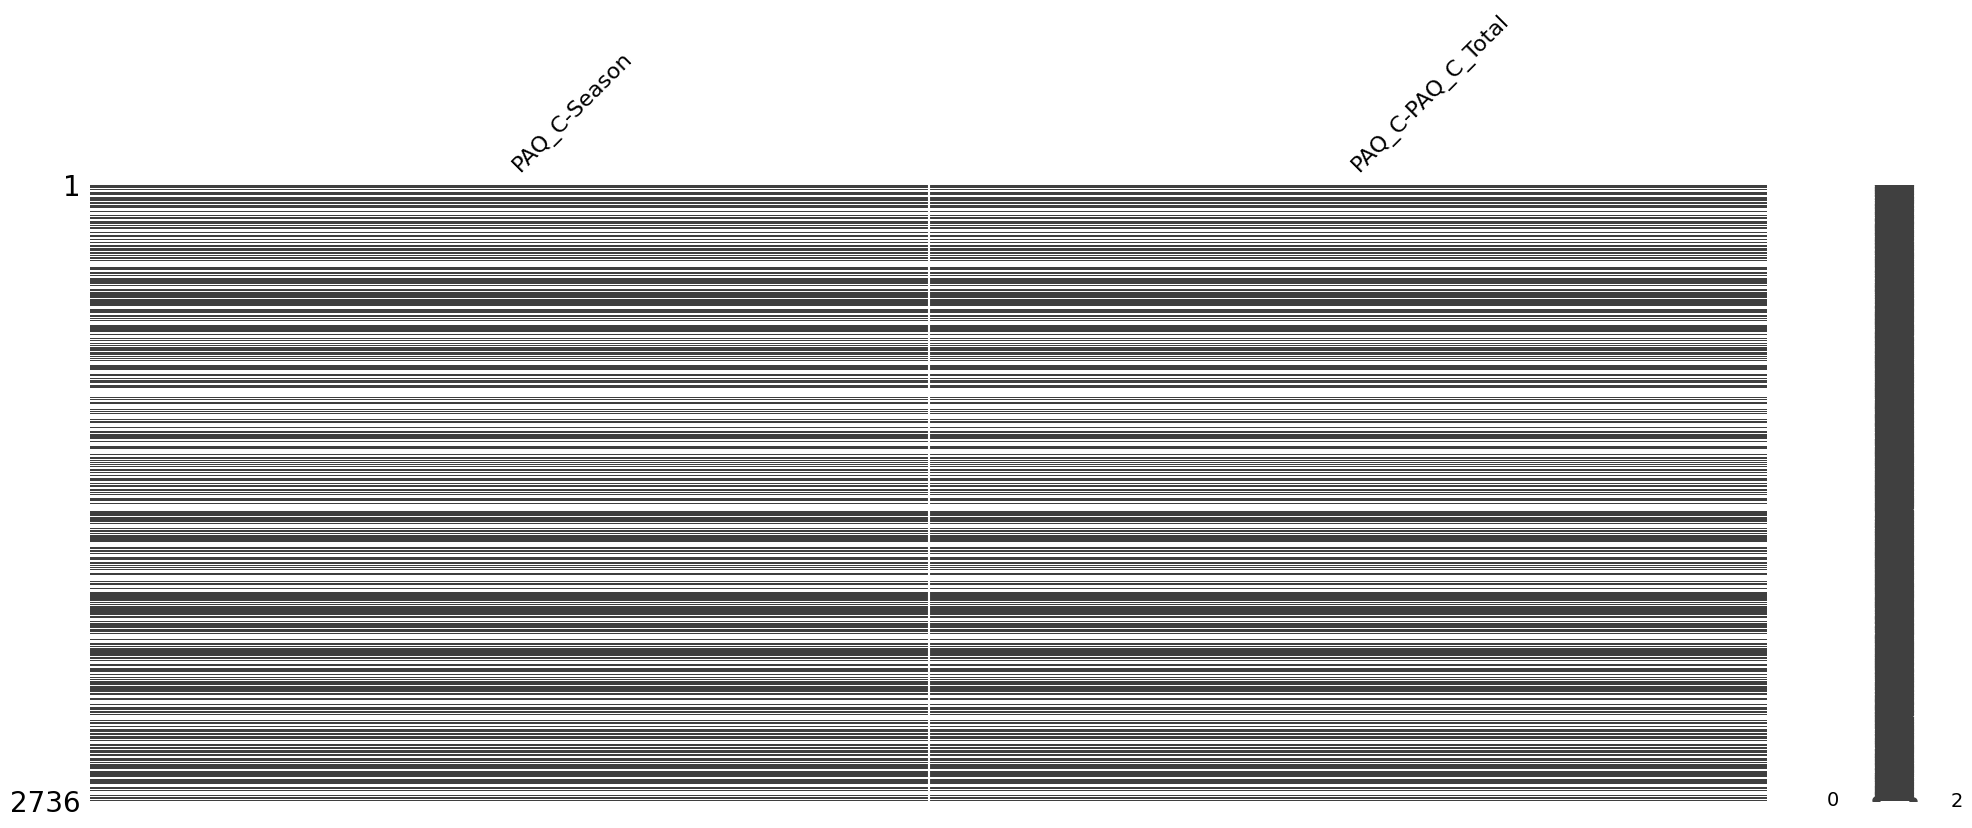

In [47]:
msno.matrix(train_supervized[PAQ_C], figsize=(24,8))

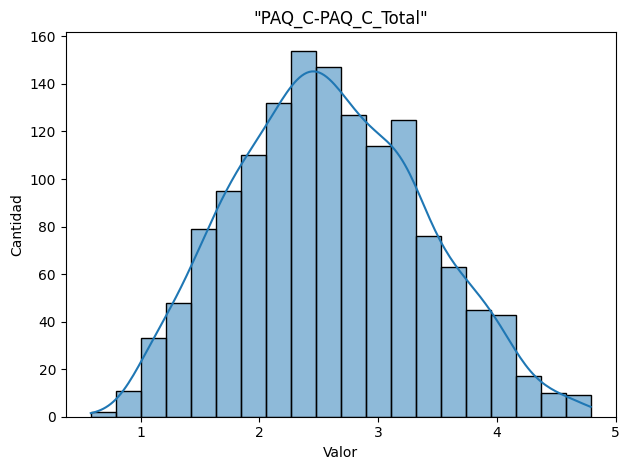

In [48]:
plt.subplot(1, 1, 1)
sns.histplot(train_supervized["PAQ_C-PAQ_C_Total"].dropna(), bins=20, kde=True)
plt.title('"PAQ_C-PAQ_C_Total"')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

Estas características tienen muchos valores faltantes, ya que están divididas en **niños** y **adolescentes**. 

Es posible crear una nueva **característica** que englobe a ambos grupos, lo que podría ayudar a reducir los valores faltantes y simplificar el análisis.


In [49]:
# TODO: Comentar esto y agregarle un formato para que se imprima bonito y asi

train_supervized["PAQ_E-PAQ_E_Total"] = train_supervized["PAQ_A-PAQ_A_Total"].fillna(train_supervized["PAQ_C-PAQ_C_Total"])

train_supervized["PAQ_E-Season"] = train_supervized["PAQ_A-Season"].fillna(train_supervized["PAQ_C-Season"])

train_supervized["PAQ_E-PAQ_E_Total"].isna().sum() * 100 / len(train_supervized)

train_supervized["PAQ_E-Season"].isna().sum() * 100 / len(train_supervized)

C:\Users\gusta\AppData\Local\Temp\ipykernel_24380\274141359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_supervized["PAQ_E-PAQ_E_Total"] = train_supervized["PAQ_A-PAQ_A_Total"].fillna(train_supervized["PAQ_C-PAQ_C_Total"])
C:\Users\gusta\AppData\Local\Temp\ipykernel_24380\274141359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_supervized["PAQ_E-Season"] = train_supervized["PAQ_A-Season"].fillna(train_supervized["PAQ_C-Season"])


34.13742690058479

Aún combinando ambas columnas, siguen existiendo bastantes **valores faltantes**. En este caso, podemos decidir si:
- **Utilizar esta columna con imputación** para el entrenamiento del modelo.
- **Eliminar la columna** por completo si los valores faltantes son demasiado numerosos para que su inclusión sea útil.


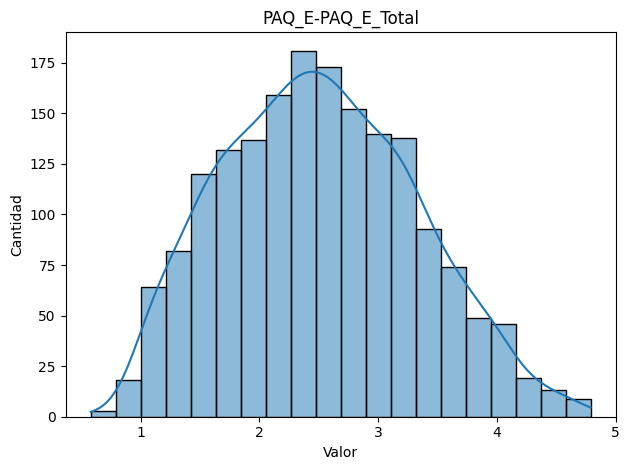

In [50]:
plt.subplot(1, 1, 1)
sns.histplot(train_supervized["PAQ_E-PAQ_E_Total"].dropna(), bins=20, kde=True)
plt.title('PAQ_E-PAQ_E_Total')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [51]:
# TODO: Que es esto (toda estas secciones hacelras mas claras)
PreInt = ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']

In [52]:
train_supervized[PreInt].isna().sum() * 100 / len(train_supervized)

PreInt_EduHx-Season                       0.621345
PreInt_EduHx-computerinternet_hoursday    2.997076
dtype: float64

In [53]:
# TODO: Que es esto (toda estas secciones hacelras mas claras)
train_supervized['PreInt_EduHx-computerinternet_hoursday'] = train_supervized['PreInt_EduHx-computerinternet_hoursday'].fillna(0)

C:\Users\gusta\AppData\Local\Temp\ipykernel_24380\3227218337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_supervized['PreInt_EduHx-computerinternet_hoursday'] = train_supervized['PreInt_EduHx-computerinternet_hoursday'].fillna(0)


In [54]:
# TODO: Que es esto (toda estas secciones hacelras mas claras)
train_supervized = train_supervized.dropna(subset=['PreInt_EduHx-Season'])

Se marcaron los **valores faltantes** de **horas al día** que tienen temporada como **menos de una hora**.

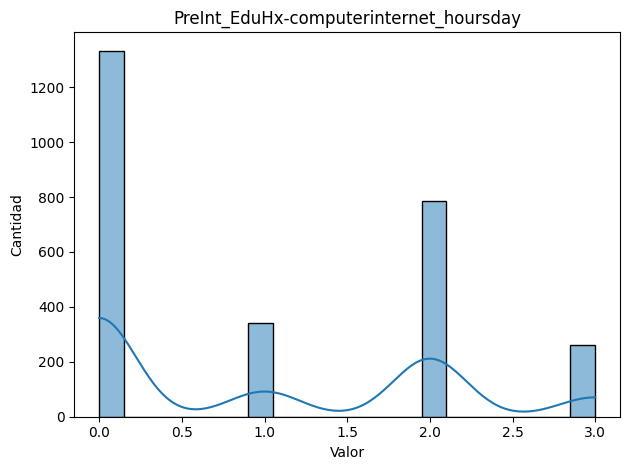

In [55]:
plt.subplot(1, 1, 1)
sns.histplot(train_supervized["PreInt_EduHx-computerinternet_hoursday"].dropna(), bins=20, kde=True)
plt.title('PreInt_EduHx-computerinternet_hoursday')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

---
## 5. Preprocesamiento y Codificación

El **preprocesamiento** de los datos y su **codificación** son pasos cruciales para usarlos como entrada a un modelo. Es importante tener en cuenta que este proceso debe ser diseñado de manera que se pueda integrar fácilmente mediante **pipelines** al modelo final, asegurando así una transición fluida y una optimización del flujo de trabajo.


In [ ]:
# TODO: Falta mejorar el titulo de abajo

### 5.1 Imputaciones, eliminacion, etc

In [ ]:
train_supervized['FGC-Season'] = train_supervized['FGC-Season'].fillna('Unknown')
train_supervized['SDS-Season'] = train_supervized["SDS-Season"].fillna('Unknown')
train_supervized['CGAS-Season'] = train_supervized["CGAS-Season"].fillna('Unknown')
train_supervized['Physical-Season'] = train_supervized["Physical-Season"].fillna('Unknown')
train_supervized['PAQ_E-Season'] = train_supervized["PAQ_E-Season"].fillna('Unknown')

train_supervized = train_supervized.drop(FGC_measures_zone, axis=1)

In [ ]:
# TODO: esto para que
train_supervized[FGC_measures].info()

In [ ]:
# TODO: Comentar

grouped = train_supervized.groupby(['Basic_Demos-Sex', 'Basic_Demos-Age'])

train_supervized[FGC_measures] = grouped[FGC_measures].transform(lambda x: x.fillna(x.median()))

In [ ]:
train_supervized[FGC_measures].info()

Los **valores faltantes** son casos aislados en los que no se registraron datos para cierta **edad** y **sexo**, lo que hace que no sea apropiado aplicar la **mediana** para imputarlos.

En este caso, lo más adecuado es **eliminar las dos columnas** que tienen muchos valores faltantes. Además, para los **registros faltantes**, se puede optar por **eliminarlos** para evitar que afecten el análisis.


In [ ]:
train_supervized = train_supervized.drop(['FGC-FGC_GSD'], axis=1)
train_supervized = train_supervized.drop(['FGC-FGC_GSND'], axis=1)
train_supervized = train_supervized.drop(['SDS-SDS_Total_Raw'], axis=1)

train_supervized['SDS-SDS_Total_T'] = train_supervized['SDS-SDS_Total_T'].fillna(50)

In [ ]:
# TODO: Este para que
train_supervized.info()

In [ ]:
train_supervized[Physical] = train_supervized[Physical].replace(0, np.nan)
train_supervized = train_supervized.drop('Physical-Waist_Circumference', axis=1)

grouped = train_supervized.groupby(['Basic_Demos-Sex', 'Basic_Demos-Age'])

train_supervized['Physical-Height'] = grouped['Physical-Height'].transform(lambda x: x.fillna(x.median()))
train_supervized['Physical-Weight'] = grouped['Physical-Weight'].transform(lambda x: x.fillna(x.median()))

# TODO: Explicar el motivo de elevar al cuadrado y multip.iocar por 703??
train_supervized['Physical-BMI'] = train_supervized['Physical-Weight'] / train_supervized['Physical-Height'] ** 2 * 703

train_supervized[bp_hr_cols] = train_supervized[bp_hr_cols].mask(train_supervized[bp_hr_cols] < 50, np.nan)

mask = (train_supervized['Physical-Systolic_BP'] <= train_supervized['Physical-Diastolic_BP'])
train_supervized[bp_hr_cols] = train_supervized[bp_hr_cols].mask(mask, np.nan)

train_supervized['Physical-HeartRate'] = train_supervized['Physical-HeartRate'].fillna(train_supervized['Physical-HeartRate'].median())
train_supervized['Physical-Diastolic_BP'] = train_supervized['Physical-Diastolic_BP'].fillna(train_supervized['Physical-Diastolic_BP'].median())
train_supervized['Physical-Systolic_BP'] = train_supervized['Physical-Systolic_BP'].fillna(train_supervized['Physical-Systolic_BP'].median())

train_supervized['CGAS-CGAS_Score'] = train_supervized['CGAS-CGAS_Score'].fillna(train_supervized['CGAS-CGAS_Score'].median())

train_supervized = train_supervized.drop(columns=['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec'])

train_supervized = train_supervized.drop(columns=['PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total'])

In [ ]:
# TODO: Nota: Esto de llenarlos con ceros no me gusta. Probablemente sea mejor eliminar estas columnas y no obtener el promedio de ambas.

train_supervized['PAQ_E-PAQ_E_Total'] = train_supervized['PAQ_E-PAQ_E_Total'].fillna(0)

train_supervized['BIA-BIA_Activity_Level_num'] = train_supervized['BIA-BIA_Activity_Level_num'].fillna(0)

# TODO: Explciar esta madre q
train_supervized['Activity_Level_num'] = train_supervized['BIA-BIA_Activity_Level_num'] + train_supervized['PAQ_E-PAQ_E_Total'] / 2

KeyError: 'PAQ_E-PAQ_E_Total'

In [ ]:
train_supervized = train_supervized.drop(columns=BIA)

train_supervized = train_supervized.dropna()
train_supervized = train_supervized.drop(columns=['id'])

In [ ]:
# Datos fiankes
train_supervized.info()

### 5.2 Separamos el conjunto de datos

In [ ]:
# Quitamos variables objetivo
X = train_supervized.drop(columns=['PCIAT-PCIAT_Total', 'sii'])
y = train_supervized['PCIAT-PCIAT_Total']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

### 5.3 Encoders

In [ ]:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns
scaler = StandardScaler()
categorical_scaler = OneHotEncoder()

transformer = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', categorical_scaler, cat_cols)
    ])

---
## 6. Reagrupamiento o visualización de los datos

In [ ]:
# TODO: NO ENTIENDO ESTA PARTE, EXPLCIAR TODO ESTO PORFAVOR JAja 

In [ ]:
regr = RandomForestRegressor(random_state=9)
legr  = LinearRegression()
GBR = GradientBoostingRegressor(random_state=9)
SVR = SVR()
lasso = Lasso(random_state=9)

In [ ]:
perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    pipe_TSNE.set_params(embedding__perplexity=i)

    X_train_transformed = pipe_TSNE.fit_transform(X_train)

    tsne_step = pipe_TSNE.named_steps["embedding"]
    divergence.append(tsne_step.kl_divergence_)

fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [ ]:
pipe_tsne = Pipeline([
    ("preprocessing", transformer),
    ("tsne", TSNE(n_components=2, perplexity=60, random_state=42))
])

In [ ]:
# TODO: y esta madrte q?
'''
X_train_tsne = pipe_tsne.fit_transform(X_train)

tsne_step = pipe_tsne.named_steps["tsne"]
kl_divergence = tsne_step.kl_divergence_
print(f"KL Divergence: {kl_divergence}")
'''

'''
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()
'''

---
## 7. Tipo de problema
El problema se manejará como una **regresión**, en la cual, basado en un valor estimado del conjunto de prueba (**test**), se convertirá a la escala del **SII** para cumplir con los requisitos establecidos.

---
## 8. Modelo inicial
Utilizar un modelo inicial simple que permita establecer un baseline del problema.

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# TODO: Todo esto de abajo no deberia ir en la parte de pre procesamiento de los datos???

In [ ]:
def map_to_bins(values):
    return np.where(values <= 30, 0,
           np.where(values <= 49, 1,
           np.where(values <= 79, 2, 3)))

In [ ]:
y_test = map_to_bins(y_test)

In [ ]:
y_test

In [ ]:
# TODO: Agrtegar el contexto del capha este para explicar que es oq ue
def cohen_kappa_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    class_predictions = map_to_bins(predictions)
    return cohen_kappa_score(y, class_predictions)

In [ ]:
# TDOO:Explciar esto?
pipe_legr = Pipeline([("preprocessing", transformer),
                ("classifier", legr)])

pipe_regr = Pipeline([("preprocessing", transformer),
                ("classifier", regr)])

pipe_SVR = Pipeline([("preprocessing", transformer),
                ("classifier", SVR)])

pipe_lasso = Pipeline([("preprocessing", transformer),
                ("classifier", lasso)])

pipe_gbr = Pipeline([("preprocessing", transformer),
                ("classifier", GBR)])

In [ ]:
# TODO: ExplciaR?

pipelines = [pipe_legr, pipe_regr, pipe_SVR, pipe_lasso, pipe_gbr]
cks_scores = []
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    class_predictions = map_to_bins(predictions)
    cks = cohen_kappa_score(y_test, class_predictions)
    cks_scores.append(cks)

In [ ]:
best_mse = max(cks_scores)
best_model_index = cks_scores.index(best_mse)
best_model = pipelines[best_model_index].steps[-1][1]

print("Best Model:", best_model)
print("Best MSE:", best_mse)

---
## 9. Metodo de busque da hiperparametros y modelo final

In [ ]:
# TODO: Fatla implemnemta sta parte

---
## 10. Evalaución del modelo

In [ ]:
# TODO: Falta implementar